## Scrub

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

df = pd.read_csv('../dsc-phase-2-project/data/kc_house_data.csv', thousands=r',')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [2]:
# Date should be a datetime object
# Sftft_basement contains strings

pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [3]:
df['date'] = pd.to_datetime(df['date'])

In [4]:
# id isn't truly an int
# price has a very large SD and outliers
# it seems that there may be a couple of outlier values driving up the max across columns
# floors, waterfront, view, condition, and grade are ordinal categorical values
# zipcode, lat, long isn't truly an int
# waterfront may be a binary variable
# year renovated contains null values, probably due to homes that have not yet been renovated

df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,19221.00,21534.00,21597.00,21597.00,21597.00,21597.00,17755.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,4580474287.77,540296.57,3.37,2.12,2080.32,15099.41,1.49,0.01,0.23,3.41,7.66,1788.60,1971.00,83.64,98077.95,47.56,-122.21,1986.62,12758.28
std,2876735715.75,367368.14,0.93,0.77,918.11,41412.64,0.54,0.09,0.77,0.65,1.17,827.76,29.38,399.95,53.51,0.14,0.14,685.23,27274.44
min,1000102.00,78000.00,1.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,3.00,370.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2123049175.00,322000.00,3.00,1.75,1430.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7308900490.00,645000.00,4.00,2.50,2550.00,10685.00,2.00,0.00,0.00,4.00,8.00,2210.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


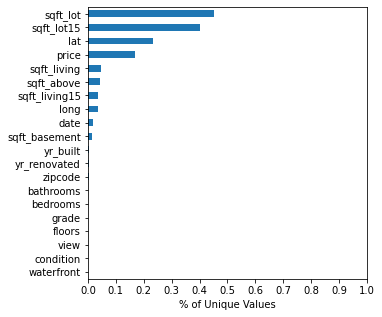

In [5]:
# Show the proportion of unique values per column

# Bathrooms, bedrooms, grade, floors, view, condition, and waterfront to have a very small number 
# of unique values. They may be categorical/ordinal
# Zipcode, year renovated, year built, basement, sqft living, sqft above, sqft living15 are all below 10%

nu_dict = dict(df.nunique())
val_list = list(nu_dict.values())

percent = []
for col, val in zip(df.columns, val_list):
    percent.append(val/len(df[col]))  
unique_per_column = pd.Series(data=percent, index=df.columns)
unique_per_column.drop('id').sort_values(ascending=True).plot(kind='barh', figsize=(5,5), xticks=np.linspace(0,1,11))
plt.xlabel('% of Unique Values');

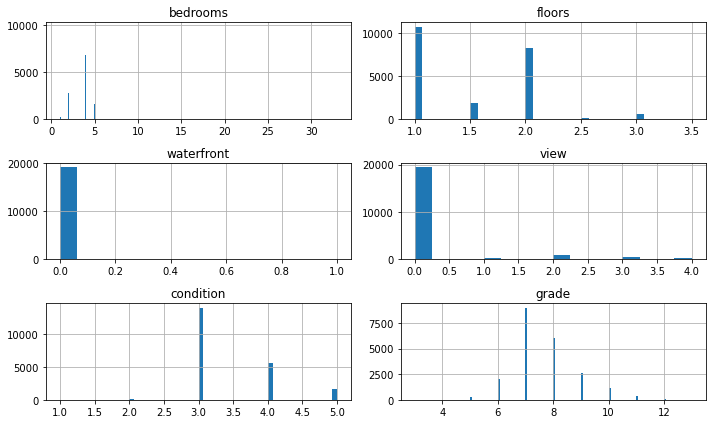

In [6]:
# It appears all but waterfront are categorical variables with ordinal values
# Waterfront is the only binary variable

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

low_nunique = []
for k,v in nu_dict.items():
    if v < 15:
        low_nunique.append(k)
    else:
        pass
low_nunique

df[low_nunique].hist(figsize=(10,6), bins='auto');
plt.tight_layout();

### Fill in missing values

<AxesSubplot:>

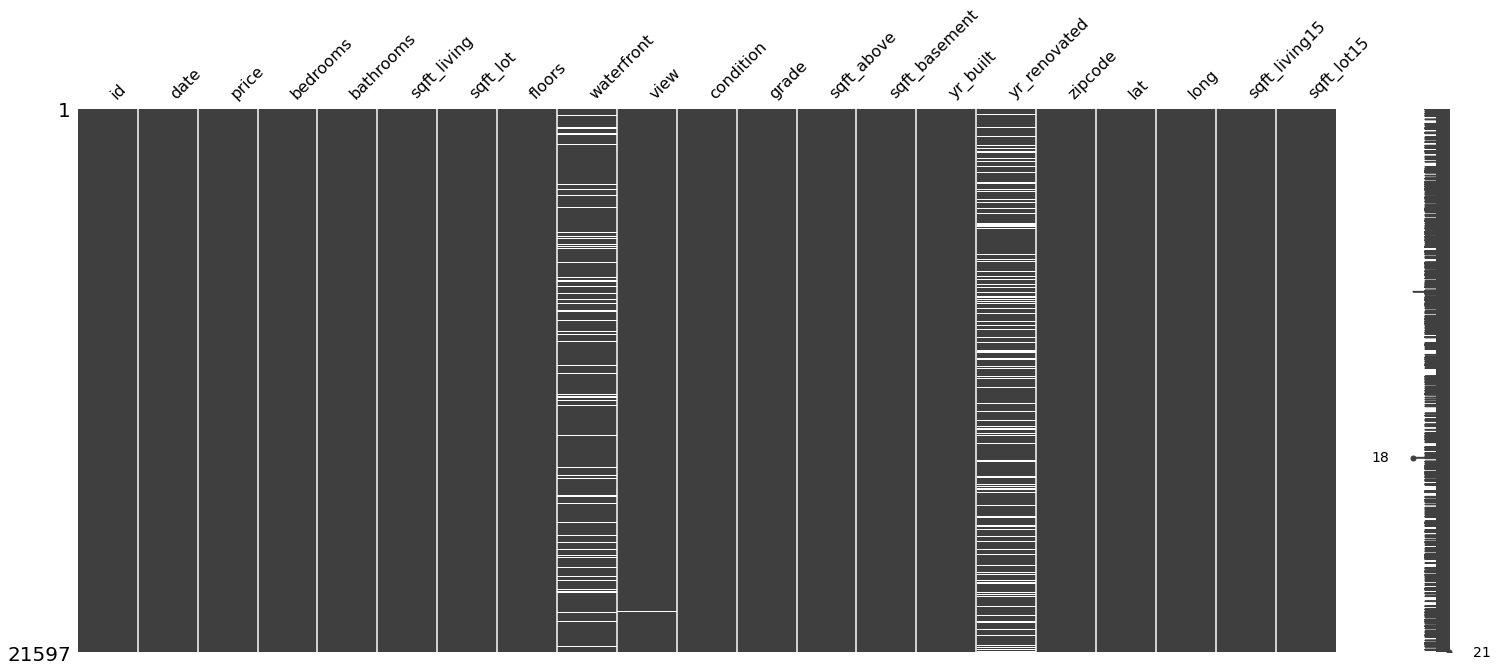

In [7]:
# Start checking for null values
# Waterfront, view, and yr_renovated are the only columns with missing data

import missingno
missingno.matrix(df)

In [8]:
null = df.isna().sum()
null[null>1]

waterfront      2376
view              63
yr_renovated    3842
dtype: int64

In [9]:
# No recognizable pattern for why certain view values are missing

print(df['view'].value_counts(1, dropna=False))
df[df['view'].isnull()]

0.00   0.90
2.00   0.04
3.00   0.02
1.00   0.02
4.00   0.01
nan    0.00
Name: view, dtype: float64


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7,2008000270,2015-01-15,291850.00,3,1.50,1060,9711,1.00,0.00,nan,3,7,1060,0.0,1963,0.00,98198,47.41,-122.31,1650,9711
114,8961960160,2014-10-28,480000.00,4,2.50,3230,16171,2.00,0.00,nan,3,9,2520,710.0,2001,0.00,98001,47.32,-122.25,2640,8517
129,7853210060,2015-04-06,430000.00,4,2.50,2070,4310,2.00,0.00,nan,3,7,2070,0.0,2004,0.00,98065,47.53,-121.85,1970,3748
205,3456000310,2014-08-04,840000.00,4,1.75,2480,11010,1.00,0.00,nan,4,9,1630,850.0,1966,nan,98040,47.54,-122.22,2770,10744
487,1895000260,2014-07-21,207950.00,2,2.00,890,5000,1.00,0.00,nan,3,6,890,0.0,1917,0.00,98118,47.52,-122.26,1860,5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19989,148000475,2014-05-28,1400000.00,4,3.25,4700,9160,1.00,0.00,nan,3,11,2520,2180.0,2005,0.00,98116,47.57,-122.41,2240,8700
20148,291310170,2014-08-04,384500.00,3,2.50,1600,2610,2.00,0.00,nan,3,8,1600,0.0,2005,nan,98027,47.53,-122.07,1445,1288
20380,1196003740,2014-09-24,734000.00,5,4.25,4110,42755,2.00,0.00,nan,3,10,2970,1140.0,2000,nan,98023,47.34,-122.34,2730,12750
21057,3448900290,2014-08-28,636230.00,4,2.50,2840,6284,2.00,0.00,nan,3,9,2840,0.0,2013,0.00,98056,47.51,-122.17,2790,7168


In [10]:
# Going to assume null value represents a home that has never been renovated

print(df['yr_renovated'].value_counts(1, dropna=False))
df[df['yr_renovated'].isnull()]

0.00      0.79
nan       0.18
2014.00   0.00
2003.00   0.00
2013.00   0.00
          ... 
1944.00   0.00
1948.00   0.00
1976.00   0.00
1934.00   0.00
1953.00   0.00
Name: yr_renovated, Length: 71, dtype: float64


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2,5631500400,2015-02-25,180000.00,2,1.00,770,10000,1.00,0.00,0.00,3,6,770,0.0,1933,nan,98028,47.74,-122.23,2720,8062
12,114101516,2014-05-28,310000.00,3,1.00,1430,19901,1.50,0.00,0.00,4,7,1430,0.0,1927,nan,98028,47.76,-122.23,1780,12697
23,8091400200,2014-05-16,252700.00,2,1.50,1070,9643,1.00,nan,0.00,3,7,1070,0.0,1985,nan,98030,47.35,-122.17,1220,8386
26,1794500383,2014-06-26,937000.00,3,1.75,2450,2691,2.00,0.00,0.00,3,8,1750,700.0,1915,nan,98119,47.64,-122.36,1760,3573
28,5101402488,2014-06-24,438000.00,3,1.75,1520,6380,1.00,0.00,0.00,3,7,790,730.0,1948,nan,98115,47.70,-122.30,1520,6235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21576,1931300412,2015-04-16,475000.00,3,2.25,1190,1200,3.00,0.00,0.00,3,8,1190,0.0,2008,nan,98103,47.65,-122.35,1180,1224
21577,8672200110,2015-03-17,1090000.00,5,3.75,4170,8142,2.00,0.00,2.00,3,10,4170,0.0,2006,nan,98056,47.54,-122.18,3030,7980
21579,1972201967,2014-10-31,520000.00,2,2.25,1530,981,3.00,0.00,0.00,3,8,1480,50.0,2006,nan,98103,47.65,-122.35,1530,1282
21581,191100405,2015-04-21,1580000.00,4,3.25,3410,10125,2.00,0.00,0.00,3,10,3410,?,2007,nan,98040,47.57,-122.22,2290,10125


In [11]:
# Handle waterfront null values
# Check if it can be explained by location

print('Has view of water (Latitude)')
print(df[df['waterfront']==1.0]['lat'].describe())
print('------------------------------------------')
print('Does not have view of water (Latitude)')
print(df[df['waterfront']==0.0]['lat'].describe())
print('------------------------------------------')
print('Has view of water (Price)')
print(df[df['waterfront']==1.0]['price'].describe())
print('------------------------------------------')
print('Does not have view of water')
print(df[df['waterfront']==0.0]['price'].describe())

Has view of water (Latitude)
count   146.00
mean     47.54
std       0.11
min      47.33
25%      47.45
50%      47.55
75%      47.61
max      47.77
Name: lat, dtype: float64
------------------------------------------
Does not have view of water (Latitude)
count   19075.00
mean       47.56
std         0.14
min        47.16
25%        47.47
50%        47.57
75%        47.68
max        47.78
Name: lat, dtype: float64
------------------------------------------
Has view of water (Price)
count       146.00
mean    1717214.73
std     1145384.86
min      285000.00
25%      827500.00
50%     1510000.00
75%     2282500.00
max     7060000.00
Name: price, dtype: float64
------------------------------------------
Does not have view of water
count     19075.00
mean     532641.99
std      344959.18
min       78000.00
25%      320000.00
50%      450000.00
75%      638600.00
max     7700000.00
Name: price, dtype: float64


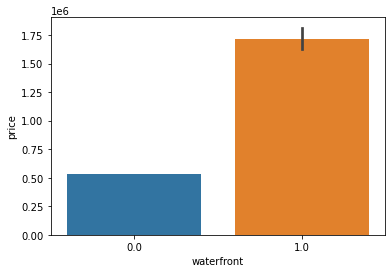

In [12]:
# Clearly waterfront homes are much more expensive

sns.barplot(data=df, x='waterfront', y='price', ci=68);

In [13]:
mplus_water =len(df[(df['price']>1000000) & df['waterfront']==1.0])
print(f'Number of houses over $1,000,000 with waterfront view:\t{mplus_water}')
mminus_water = len(df[(df['price']<1000000) & df['waterfront']==1.0])
print(f'Number of houses under $1,000,000 with waterfront view:\t{mminus_water}')

Number of houses over $1,000,000 with waterfront view:	96
Number of houses under $1,000,000 with waterfront view:	49


In [14]:
# Going to impute categorical variables the probability that they appear in the dataset
# Begin with waterfront and functionize

# Prior count below:
# 0.00    19075
# 1.00      146
pd.set_option('display.float_format', lambda x: '%.5f' % x)
# Prob of having waterfront view for homes over $1,000,000
print('$1M+ with waterfront');
print(df.loc[df['price']>1000000]['waterfront'].value_counts(1));
print('------------------------------------------')
# Prob of having waterfront view for homes under $1,000,000
print('$1M- with waterfront');
print(df.loc[df['price']<1000000]['waterfront'].value_counts(1))

$1M+ with waterfront
0.00000   0.92666
1.00000   0.07334
Name: waterfront, dtype: float64
------------------------------------------
$1M- with waterfront
0.00000   0.99726
1.00000   0.00274
Name: waterfront, dtype: float64


In [15]:
def impute_cat(df, col):
    '''
    Impute null value with value based on liklihood
    of occurring in the original column
    '''
    val_prob = dict(df[col].value_counts(1))
    prob = list(val_prob.values())
    val = list(val_prob.keys())
    np.random.choice(val, p=prob)
    df[col].fillna(np.random.choice(val, p=prob), inplace=True)
    return df

In [16]:
# Handling question mark as null value

df['sqft_basement'].replace(to_replace='?', value='0.0',inplace=True)
s = df['sqft_basement']
pd.to_numeric(s, downcast='integer')

0          0
1        400
2          0
3        910
4          0
        ... 
21592      0
21593      0
21594      0
21595      0
21596      0
Name: sqft_basement, Length: 21597, dtype: int16

In [17]:
df['sqft_basement'].value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
283.0         1
792.0         1
861.0         1
2810.0        1
248.0         1
Name: sqft_basement, Length: 303, dtype: int64

In [18]:
df['basementyes'] = (df['sqft_basement']!='0.0').map({True:1,
                                                      False: 0})

In [19]:
df['basementyes'].value_counts(1)

0   0.61490
1   0.38510
Name: basementyes, dtype: float64

In [20]:
df_1mplus=df.loc[df['price']>1000000]
df_1mminus=df.loc[df['price']<1000000]

In [21]:
df_1mplus =impute_cat(df_1mplus, 'waterfront')

/Users/ethankunin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [22]:
df_1mminus['waterfront'] =df_1mminus['waterfront'].fillna(0)

<ipython-input-22-d246c886c934>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1mminus['waterfront'] =df_1mminus['waterfront'].fillna(0)


In [23]:
df=pd.concat([df_1mminus, df_1mplus])

In [24]:
# Quality of the view from the home based on scale of 1-4

impute_cat(df, 'view')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basementyes
0,7129300520,2014-10-13,221900.00000,3,1.00000,1180,5650,1.00000,0.00000,0.00000,3,7,1180,0.0,1955,0.00000,98178,47.51120,-122.25700,1340,5650,0
1,6414100192,2014-12-09,538000.00000,3,2.25000,2570,7242,2.00000,0.00000,0.00000,3,7,2170,400.0,1951,1991.00000,98125,47.72100,-122.31900,1690,7639,1
2,5631500400,2015-02-25,180000.00000,2,1.00000,770,10000,1.00000,0.00000,0.00000,3,6,770,0.0,1933,nan,98028,47.73790,-122.23300,2720,8062,0
3,2487200875,2014-12-09,604000.00000,4,3.00000,1960,5000,1.00000,0.00000,0.00000,5,7,1050,910.0,1965,0.00000,98136,47.52080,-122.39300,1360,5000,1
4,1954400510,2015-02-18,510000.00000,3,2.00000,1680,8080,1.00000,0.00000,0.00000,3,8,1680,0.0,1987,0.00000,98074,47.61680,-122.04500,1800,7503,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21574,7430200100,2014-05-14,1220000.00000,4,3.50000,4910,9444,1.50000,0.00000,0.00000,3,11,3110,1800.0,2007,0.00000,98074,47.65020,-122.06600,4560,11063,1
21577,8672200110,2015-03-17,1090000.00000,5,3.75000,4170,8142,2.00000,0.00000,2.00000,3,10,4170,0.0,2006,nan,98056,47.53540,-122.18100,3030,7980,0
21581,191100405,2015-04-21,1580000.00000,4,3.25000,3410,10125,2.00000,0.00000,0.00000,3,10,3410,0.0,2007,nan,98040,47.56530,-122.22300,2290,10125,0
21584,249000205,2014-10-15,1540000.00000,5,3.75000,4470,8088,2.00000,0.00000,0.00000,3,11,4470,0.0,2008,0.00000,98004,47.63210,-122.20000,2780,8964,0


In [25]:
# Consider 0 to mean the home has not been renovated
# Conservativley determined null values should be considered non-renovated homes

df['yr_renovated'].value_counts().sort_values(ascending=False).nlargest(30)

0.00000       16988
2014.00000       73
2003.00000       31
2013.00000       31
2007.00000       30
2000.00000       29
2005.00000       29
1990.00000       22
2004.00000       22
2009.00000       21
1989.00000       20
2006.00000       20
2002.00000       17
1998.00000       16
1984.00000       16
2010.00000       15
1983.00000       15
2001.00000       15
1999.00000       15
2008.00000       15
1991.00000       15
2015.00000       14
1985.00000       14
1986.00000       14
1987.00000       14
1994.00000       14
1992.00000       13
1993.00000       12
1997.00000       12
1995.00000       12
Name: yr_renovated, dtype: int64

In [26]:
# No null values remaining

df['yr_renovated'].fillna(0, inplace=True)

### Handle Duplicates

In [27]:
# I found duplicates in the id column. I interpreted them as changes in ownership because the characterestics
# were the same outside of the date. I decided to keep 'last' because that reflects the most recent listing

pd.set_option('display.max_rows', 500)

df[df.duplicated(subset=['id'],keep=False)]
df=df.drop_duplicates(subset=['id'], keep='last')

In [28]:
# df.sort_values(by='total_rooms', ascending=False)
## 33 bedrooms, believed to be human error because it did not correspond with sqft living
df=df.drop(15856)

## Baseline Model

In [29]:
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf

from scipy import stats
from sklearn.preprocessing import StandardScaler
from statsmodels.formula.api import ols

In [30]:
def model_summary(df, X_targets, y, qq=True):
    '''
    Produces OLS Linear Regression summary. True/False toggles if the QQ
    plot is displayed below the summary
    '''
    outcome = y
    x_cols = X_targets
    predictors = '+'.join(x_cols)
    formula = outcome + '~' + predictors
    model = ols(formula=formula, data=df).fit()
    resid1 = model.resid
    display(model.summary())
    if qq==True:
        
        sm.graphics.qqplot(resid1, dist=stats.norm, line='45', fit=True);
    
    return model

In [31]:

x_baseline = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basementyes']


In [32]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics


def sked_show(df, X_cols, lr=None, val='price'):
    '''
    Produces scatter plot showing measue of homoskedacicity
    '''
    if lr is None:
        lr = LinearRegression()
        lr.fit(df[X_cols], df[val])

        y_hat = lr.predict(df[X_cols])
    else:
        y_hat = lr.predict(df)

    
    resid = (df[val] - y_hat)
    fig, ax= plt.subplots(figsize=(5,5))
    ax.scatter(x=y_hat,y=resid, alpha=0.1)
    ax.axhline(0, color='red')
    ax.set_xlabel('Price')
    ax.set_ylabel('Residual')
    return fig,ax

In [33]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2772.
Date:                Mon, 19 Apr 2021   Prob (F-statistic):               0.00
Time:                        08:57:15   Log-Likelihood:            -2.9152e+05
No. Observations:               21387   AIC:                         5.831e+05
Df Residuals:                   21368   BIC:                         5.832e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.718e+06   2.96e+06      2.269      0.023    9.14e+05    1.25e+07
bedrooms      -3.947e+04   1995.219    -19.782      0.000   -4.34e+04   -3.56e+04
bathrooms      4.386e+04   3311.837     13.242      0.000    3.74e+04    5.03e+04
sqft_living     154.0667      6.047     25.478      0.000     142.214     165.920
sqft_lot          0.1239      0.048      2.583      0.010       0.030       0.218
floors         6286.6806   3615.492      1.739      0.082    -799.956    1.34e+04
waterfront     6.205e+05   1.82e+04     34.080      0.000    5.85e+05    6.56e+05
view           5.307e+04   2136.663     24.839      0.000    4.89e+04    5.73e+04
condition      2.632e+04   2366.782     11.121      0.000    2.17e+04     3.1e+04
grade          9.645e+04   2179.461     44.252      0.000    9.22e+04    1.01e+05
sqft_above       28.2441      6.608      4.274      0.000      15.292      41.196
yr_built      -2657.3467     72.367    -36.721      0.000   -2799.191   -2515.502
yr_renovated     23.7180      3.995      5.936      0.000      15.887      31.549
zipcode        -584.3960     33.219    -17.592      0.000    -649.508    -519.284
lat            6.002e+05   1.08e+04     55.637      0.000    5.79e+05    6.21e+05
long          -2.177e+05   1.32e+04    -16.435      0.000   -2.44e+05   -1.92e+05
sqft_living15    21.1994      3.464      6.119      0.000      14.409      27.990
sqft_lot15       -0.3950      0.073     -5.379      0.000      -0.539      -0.251
basementyes   -2893.6903   5096.237     -0.568      0.570   -1.29e+04    7095.317
==============================================================================
Omnibus:                    18115.994   Durbin-Watson:                   1.619
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1802205.182
Skew:                           3.548   Prob(JB):                         0.00
Kurtosis:                      47.408   Cond. No.                     2.17e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.17e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(<Figure size 360x360 with 1 Axes>,
 <AxesSubplot:xlabel='Price', ylabel='Residual'>)

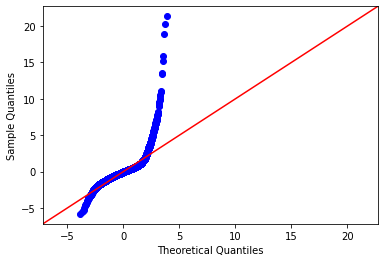

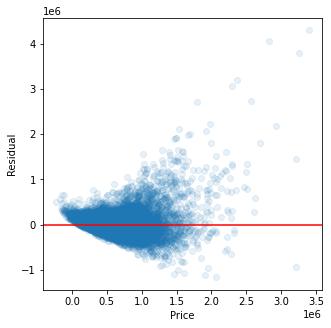

In [34]:
model_base = model_summary(df, x_baseline, 'price')
sked_show(df, x_baseline, model_base)

### Baseline Model Conclusion
- R^2 is 0.70
- QQ Plot deviates significantly around the 3rd quantile
- Floors and basement are not statistically significant
- Residuals trail off around $1.5 million, begins to become cone shaped
- Model not meet assumption of homoscedasticity

## EDA/New Feature Model

In [35]:
def distr_(df, col):
    fig, ax = plt.subplots(figsize=(8,7), nrows=3, gridspec_kw={'height_ratios': [2,1,4]});
    mean=df[col].mean()
    median=df[col].median()
    max_=df[col].max()
    min_=df[col].min()
    std_=df[col].std()
    sns.histplot(df[col],alpha=0.5,stat='density',ax=ax[0]);
    sns.kdeplot(df[col],color='green',ax=ax[0]);
    ax[0].set_xlabel(col)
    ax[0].set_title(f'{col} Distribution')
    ax[0].axvline(mean, label=f'Mean: {mean}', c='red')
    ax[0].axvline(median, label=f'median: {median}', c='red', linestyle=':')
    ax[0].legend()
    
    sns.boxplot(data=df, x=col, ax=ax[1]);
    
    sns.scatterplot(data=df, x=df[col], y=df['price']);
    
    fig.tight_layout();
    print(f'{col.capitalize()} Summary')
    print(f'Median: {median}')
    print(f'Mean: {mean:.4}')
    print(f'Max: {max_}')
    print(f'Min: {min_}')
    print(f'Std: {std_:.4}')
    plt.show()


Price Summary
Median: 450000.0
Mean: 5.412e+05
Max: 7700000.0
Min: 78000.0
Std: 3.674e+05


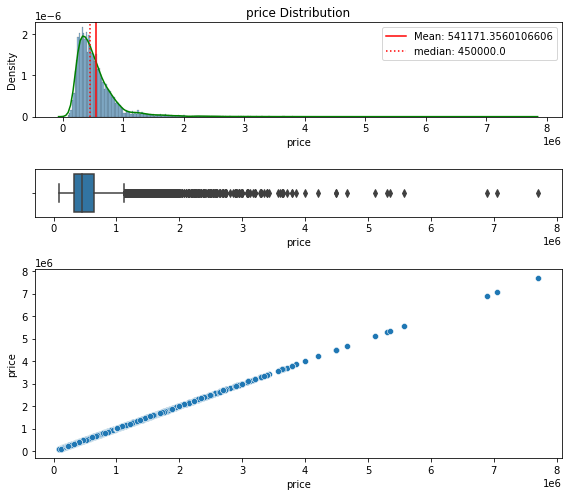

None
---------------------------------------------------------------------------------------
Bedrooms Summary
Median: 3.0
Mean: 3.372
Max: 11
Min: 1
Std: 0.9028


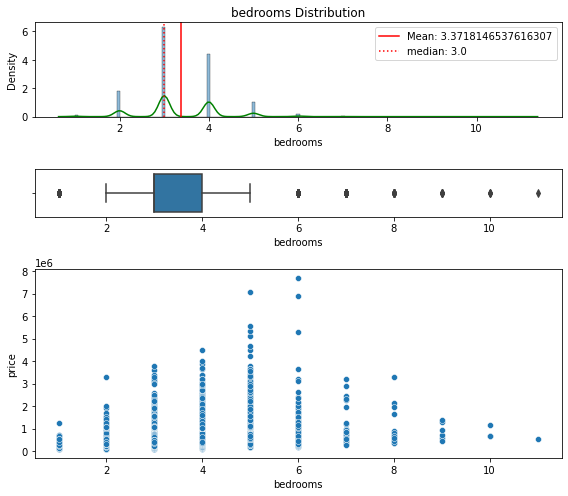

None
---------------------------------------------------------------------------------------
Bathrooms Summary
Median: 2.25
Mean: 2.118
Max: 8.0
Min: 0.5
Std: 0.7685


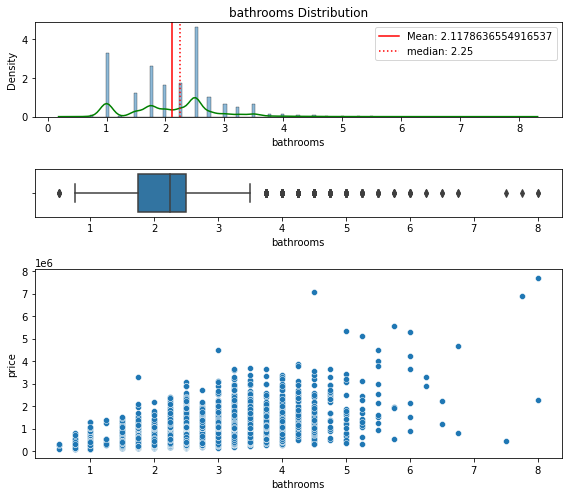

None
---------------------------------------------------------------------------------------
Sqft_living Summary
Median: 1920.0
Mean: 2.082e+03
Max: 13540
Min: 370
Std: 918.7


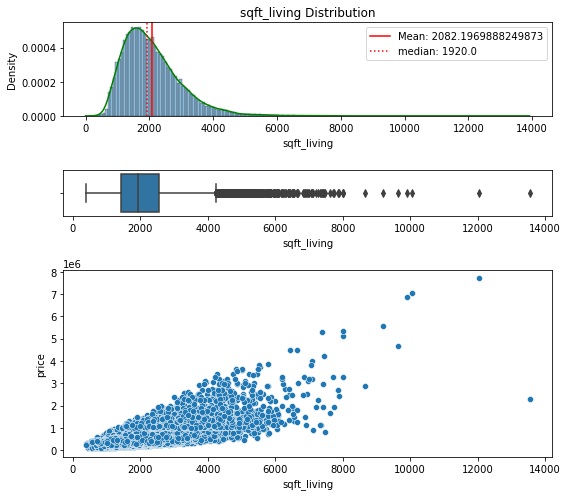

None
---------------------------------------------------------------------------------------
Sqft_lot Summary
Median: 7610.0
Mean: 1.513e+04
Max: 1651359
Min: 520
Std: 4.156e+04


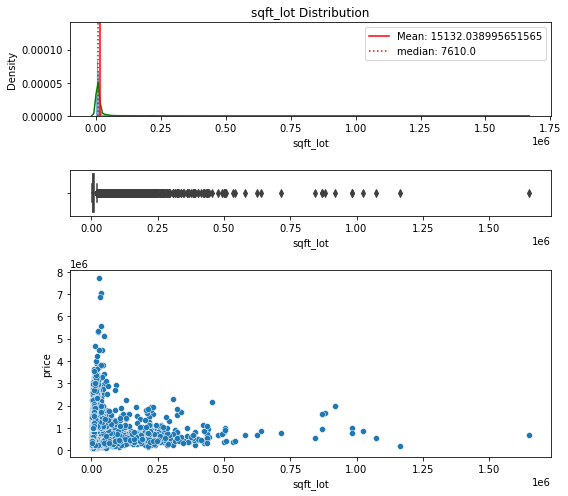

None
---------------------------------------------------------------------------------------
Floors Summary
Median: 1.5
Mean: 1.496
Max: 3.5
Min: 1.0
Std: 0.54


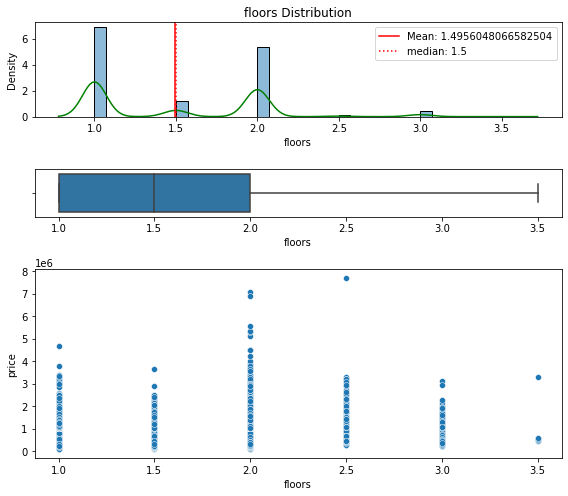

None
---------------------------------------------------------------------------------------
Waterfront Summary
Median: 0.0
Mean: 0.00678
Max: 1.0
Min: 0.0
Std: 0.08206


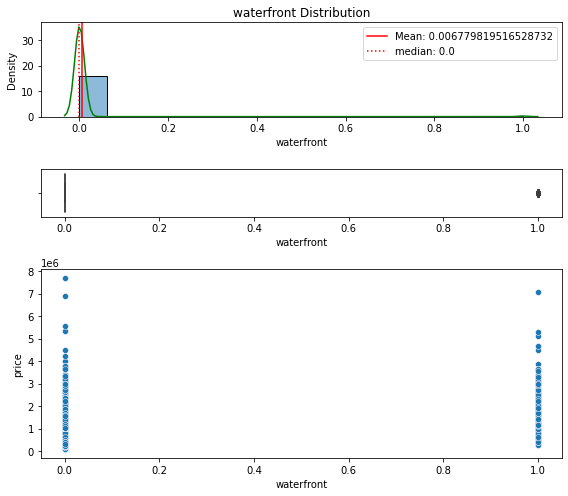

None
---------------------------------------------------------------------------------------
View Summary
Median: 0.0
Mean: 0.2332
Max: 4.0
Min: 0.0
Std: 0.7639


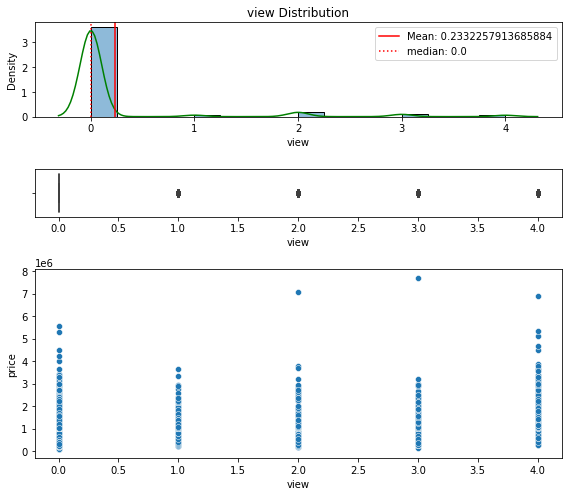

None
---------------------------------------------------------------------------------------
Condition Summary
Median: 3.0
Mean: 3.41
Max: 5
Min: 1
Std: 0.6495


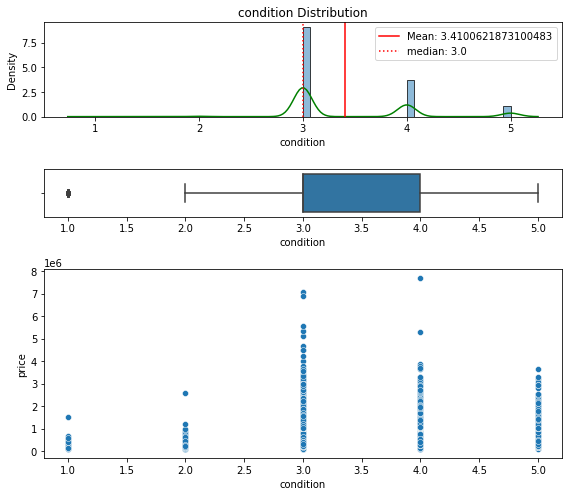

None
---------------------------------------------------------------------------------------
Grade Summary
Median: 7.0
Mean: 7.661
Max: 13
Min: 3
Std: 1.171


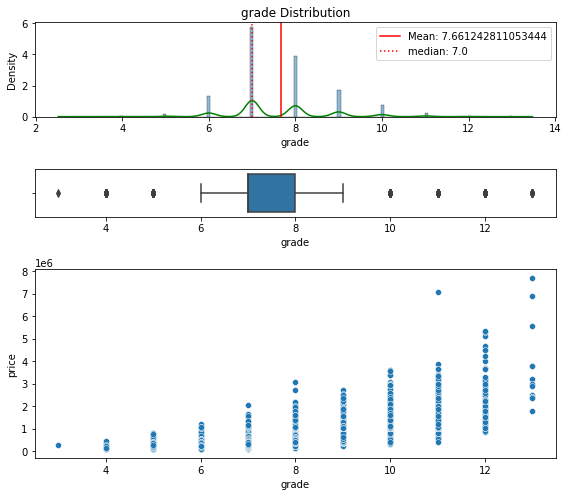

None
---------------------------------------------------------------------------------------
Sqft_above Summary
Median: 1560.0
Mean: 1.79e+03
Max: 9410
Min: 370
Std: 828.6


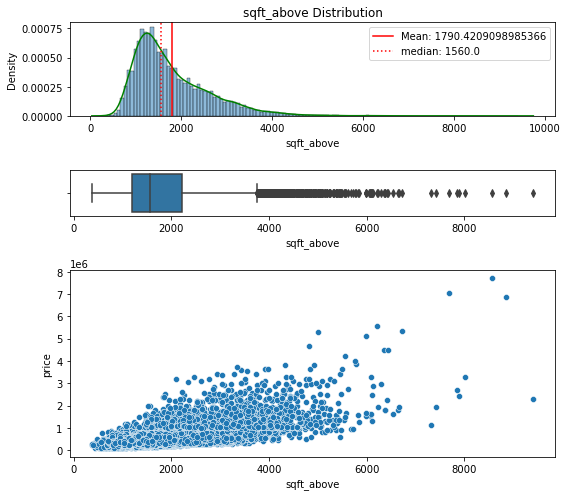

None
---------------------------------------------------------------------------------------
Yr_built Summary
Median: 1975.0
Mean: 1.971e+03
Max: 2015
Min: 1900
Std: 29.37


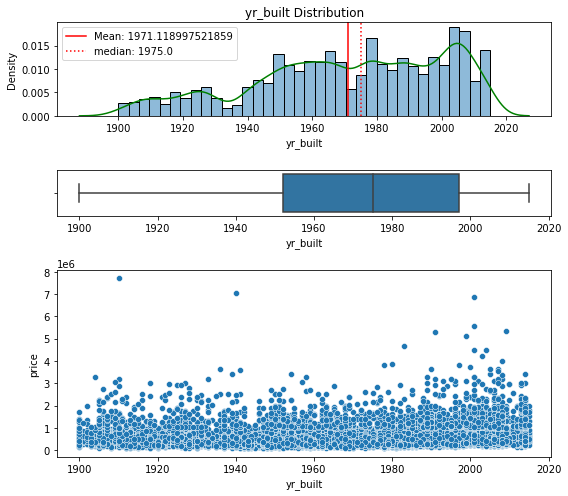

None
---------------------------------------------------------------------------------------
Yr_renovated Summary
Median: 0.0
Mean: 68.88
Max: 2015.0
Min: 0.0
Std: 364.4


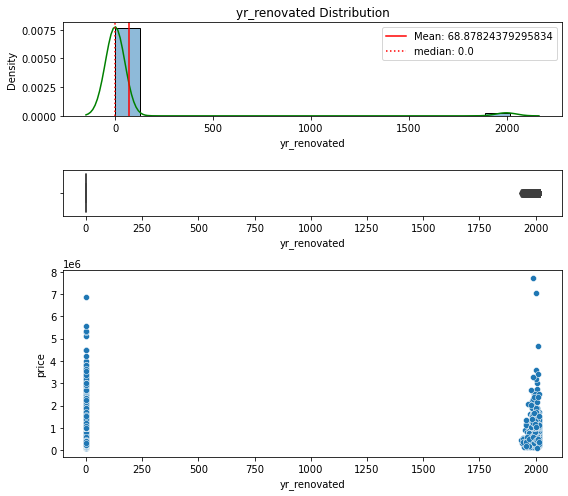

None
---------------------------------------------------------------------------------------
Zipcode Summary
Median: 98065.0
Mean: 9.808e+04
Max: 98199
Min: 98001
Std: 53.48


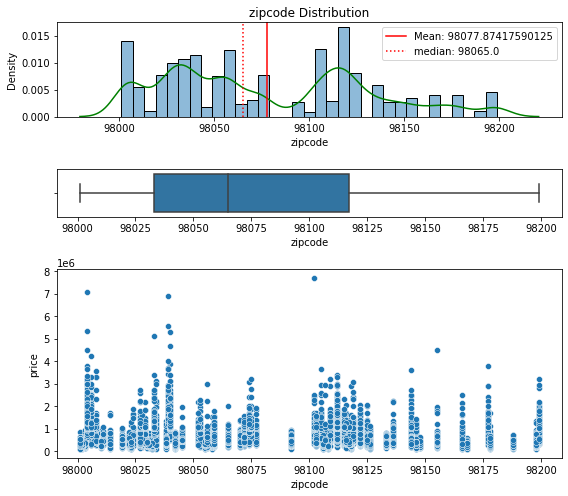

None
---------------------------------------------------------------------------------------
Sqft_living15 Summary
Median: 1840.0
Mean: 1.988e+03
Max: 6210
Min: 399
Std: 685.4


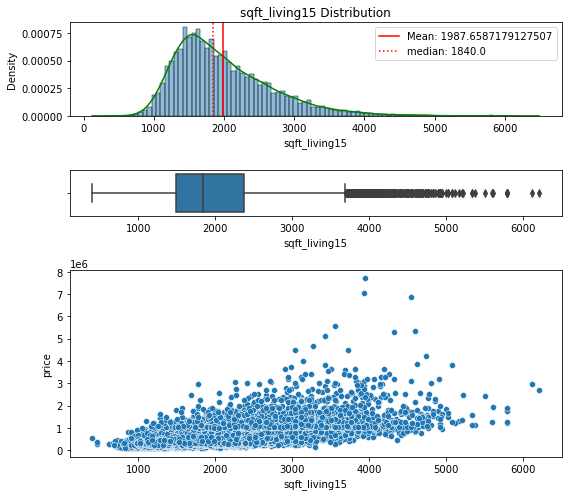

None
---------------------------------------------------------------------------------------
Sqft_lot15 Summary
Median: 7620.0
Mean: 1.278e+04
Max: 871200
Min: 651
Std: 2.736e+04


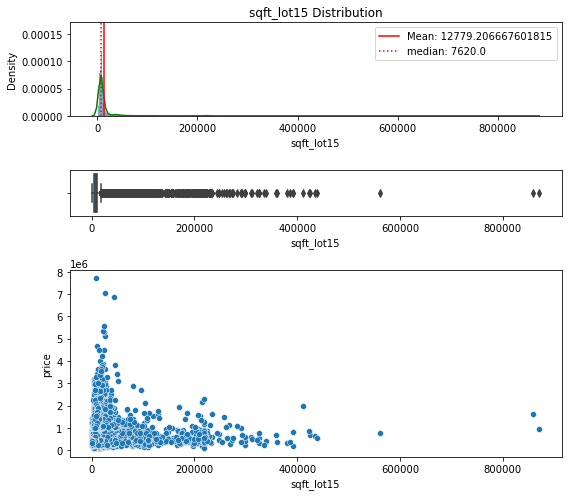

None
---------------------------------------------------------------------------------------
Basementyes Summary
Median: 0.0
Mean: 0.385
Max: 1
Min: 0
Std: 0.4866


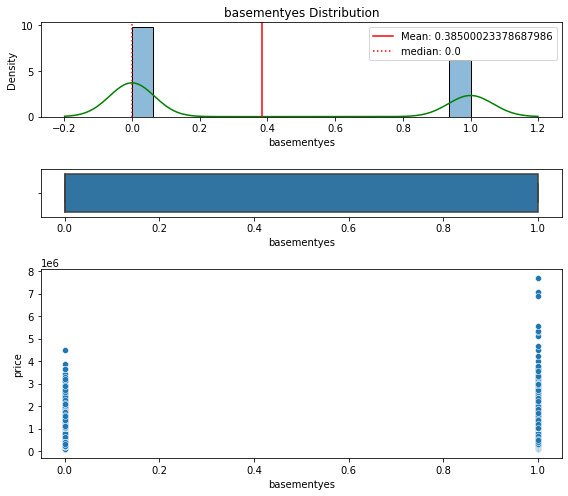

None
---------------------------------------------------------------------------------------


In [36]:
eda_check = ['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'yr_built', 'yr_renovated', 'zipcode',
       'sqft_living15', 'sqft_lot15', 'basementyes']
for col in eda_check:
    print(distr_(df, col))
    print('---------------------------------------------------------------------------------------')

EDA Results
- Price is right skewed
- Bedrooms increases up to 5/6 and then decreases
- Bathrooms increases with price
- Sqft living is right skewed and has a positive relationship with price
- Floors doesn't seem to have a relationship with price
- View doesn't seem to have a relationship with price
- Condition increases as price increases
- Grade increases as price increases
- Sqft above increases with price
- Year built doesn't have a relationship with price
- Year renovated looks equivalent
- Zipcode varies
- Sqft lot does not look linear

In [37]:
# Total rooms
# Addition, multiplication would create too large of a SD. ie (2 beds 1 bath=3, 4 beds 1 bath=5)
df['total_rooms'] = df['bedrooms']+df['bathrooms']

In [38]:
# Had erroniously stated 33 bedrooms and 1.5 bathrooms
# df=df.drop(15856)
df.sort_values(by='total_rooms', ascending=False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basementyes,total_rooms
8537,424049043,2014-08-11,450000.00000,9,7.50000,4050,6504,2.00000,0.00000,0.00000,3,7,4050,0.0,1996,0.00000,98144,47.59230,-122.30100,1448,3866,0,16.50000
13301,627300145,2014-08-14,1150000.00000,10,5.25000,4590,10920,1.00000,0.00000,2.00000,3,9,2500,2090.0,2008,0.00000,98004,47.58610,-122.11300,2730,10400,1,15.25000
12764,1225069038,2014-05-05,2280000.00000,7,8.00000,13540,307752,3.00000,0.00000,4.00000,3,12,9410,4130.0,1999,0.00000,98053,47.66750,-121.98600,4850,217800,1,15.00000
8748,1773100755,2014-08-21,520000.00000,11,3.00000,3000,4960,2.00000,0.00000,0.00000,3,7,2400,600.0,1918,1999.00000,98106,47.55600,-122.36300,1420,4960,1,14.00000
7245,6762700020,2014-10-13,7700000.00000,6,8.00000,12050,27600,2.50000,0.00000,3.00000,4,13,8570,3480.0,1910,1987.00000,98102,47.62980,-122.32300,3940,8800,1,14.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1973,5101404170,2014-11-13,200000.00000,1,0.75000,680,9600,1.00000,0.00000,0.00000,3,5,680,0.0,1947,0.00000,98115,47.69640,-122.30600,1580,6624,0,1.75000
9811,3598600049,2015-04-24,224000.00000,1,0.75000,840,7203,1.50000,0.00000,0.00000,3,6,840,0.0,1949,0.00000,98168,47.47560,-122.30100,1560,8603,0,1.75000
8614,6303400395,2015-01-30,325000.00000,1,0.75000,410,8636,1.00000,0.00000,0.00000,2,4,410,0.0,1953,0.00000,98146,47.50770,-122.35700,1190,8636,0,1.75000
10469,7129304375,2014-07-14,202000.00000,1,0.75000,590,5650,1.00000,0.00000,0.00000,3,6,590,0.0,1944,0.00000,98118,47.51810,-122.26700,980,5650,0,1.75000


Total_rooms Summary
Median: 5.5
Mean: 5.49
Max: 16.5
Min: 1.5
Std: 1.463


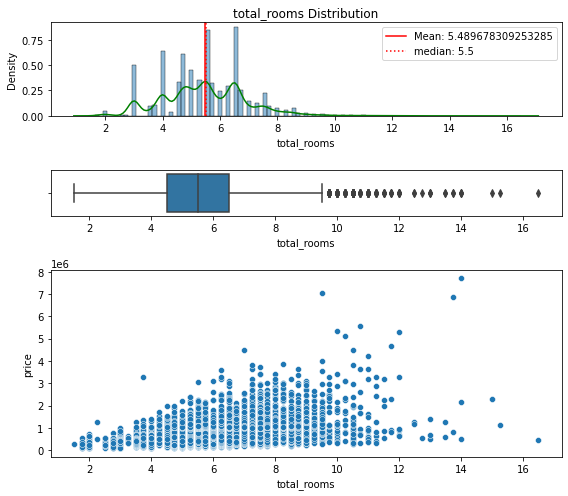

In [39]:
distr_(df, 'total_rooms')

In [40]:
# SQF vs. neighborhood average Living
df['living_vs_neighbor'] = df['sqft_living']/df['sqft_living15']

Living_vs_neighbor Summary
Median: 1.0
Mean: 1.054
Max: 6.0
Min: 0.1872791519434629
Std: 0.3203


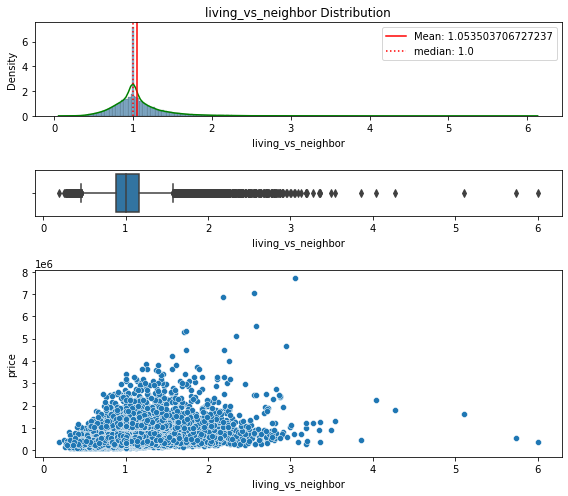

In [41]:
distr_(df, 'living_vs_neighbor')

In [42]:
df['lot_vs_neighbor'] = df['sqft_lot']/df['sqft_lot15']

Lot_vs_neighbor Summary
Median: 1.0
Mean: 1.134
Max: 87.52717948717948
Min: 0.054971997700810314
Std: 1.286


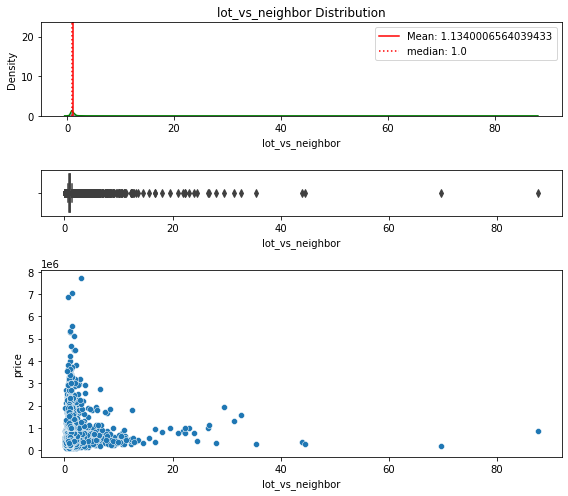

In [43]:
distr_(df, 'lot_vs_neighbor')

In [44]:
# SQF vs. lot size
df['live_lot'] = df['sqft_living']/df['sqft_lot']

Live_lot Summary
Median: 0.248
Mean: 0.3244
Max: 4.653846153846154
Min: 0.0006095498431482305
Std: 0.2692


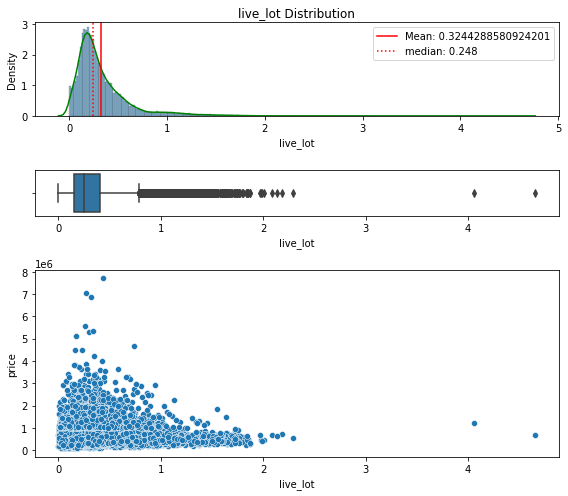

In [45]:
distr_(df, 'live_lot')

In [46]:
df['renovated_yes'] = (df['yr_renovated']!=0).map({True:1,
                                                   False: 0})
df['renovated_yes'].value_counts(1)

0   0.96549
1   0.03451
Name: renovated_yes, dtype: float64

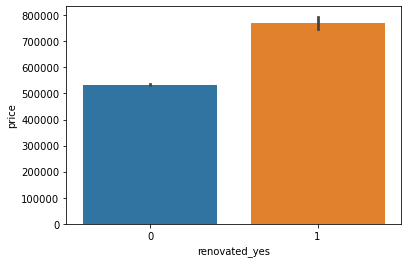

Has had renovation mean price: 770466.14
Has NOT had renovation mean price: 532976.31


In [47]:
# Homes that have been renovated have greater mean price

sns.barplot(data=df, x='renovated_yes', y='price', ci=68);
plt.show()
print(f"Has had renovation mean price: {round(df[df['renovated_yes']==1]['price'].mean(),2)}")
print(f"Has NOT had renovation mean price: {round(df[df['renovated_yes']==0]['price'].mean(),2)}")

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     2614.
Date:                Mon, 19 Apr 2021   Prob (F-statistic):               0.00
Time:                        08:57:40   Log-Likelihood:            -2.9117e+05
No. Observations:               21387   AIC:                         5.824e+05
Df Residuals:                   21366   BIC:                         5.826e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.448e+07   2.95e+06      4.909      0.000     8.7e+06    2.03e+07
bedrooms           -3.551e+04   1866.090    -19.030      0.000   -3.92e+04   -3.19e+04
bathrooms           4.065e+04   2381.239     17.072      0.000     3.6e+04    4.53e+04
sqft_living          279.7819      7.979     35.066      0.000     264.143     295.421
sqft_lot               0.1747      0.061      2.884      0.004       0.056       0.293
floors             -2.183e+04   4272.861     -5.109      0.000   -3.02e+04   -1.35e+04
waterfront          6.235e+05   1.79e+04     34.785      0.000    5.88e+05    6.59e+05
view                5.337e+04   2101.482     25.394      0.000    4.92e+04    5.75e+04
condition           2.584e+04   2301.904     11.224      0.000    2.13e+04    3.03e+04
grade                9.67e+04   2146.728     45.047      0.000    9.25e+04    1.01e+05
sqft_above            48.0559      6.555      7.332      0.000      35.208      60.903
yr_built           -2943.7297     69.090    -42.607      0.000   -3079.151   -2808.309
sqft_living15       -130.1541      7.326    -17.766      0.000    -144.513    -115.795
sqft_lot15            -0.2132      0.084     -2.527      0.012      -0.379      -0.048
basementyes        -1581.4224   5109.472     -0.310      0.757   -1.16e+04    8433.526
zipcode             -606.7536     32.743    -18.531      0.000    -670.931    -542.576
lat                 5.832e+05   1.07e+04     54.720      0.000    5.62e+05    6.04e+05
long               -1.857e+05   1.31e+04    -14.128      0.000   -2.11e+05    -1.6e+05
total_rooms         5139.3667   1157.167      4.441      0.000    2871.232    7407.501
living_vs_neighbor -2.953e+05   1.23e+04    -24.084      0.000   -3.19e+05   -2.71e+05
lot_vs_neighbor     -739.6128   1374.112     -0.538      0.590   -3432.976    1953.750
live_lot            1.019e+05   7652.203     13.319      0.000    8.69e+04    1.17e+05
==============================================================================
Omnibus:                    16214.800   Durbin-Watson:                   1.628
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1099789.781
Skew:                           3.073   Prob(JB):                         0.00
Kurtosis:                      37.589   Cond. No.                     4.73e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.7e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

(<Figure size 360x360 with 1 Axes>,
 <AxesSubplot:xlabel='Price', ylabel='Residual'>)

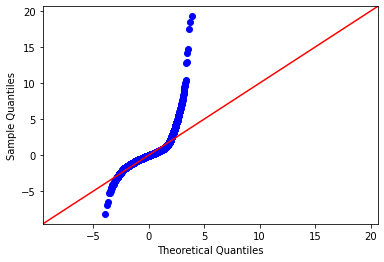

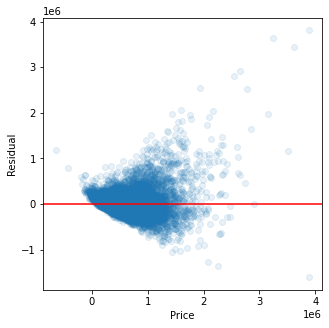

In [48]:
X_feats = ['bedrooms', 'bathrooms', 'sqft_living',
           'sqft_lot', 'floors', 'waterfront', 'view',
           'condition', 'grade','sqft_above', 'yr_built',
           'sqft_living15', 'sqft_lot15', 'basementyes', 'zipcode',
           'lat', 'long', 'total_rooms', 'living_vs_neighbor',
           'lot_vs_neighbor','live_lot']

new_feat_model = model_summary(df, X_feats, 'price')
sked_show(df, X_feats, new_feat_model)

### New Feature Model Conclusion
- R^2 imporved to 0.71
- Basementyes and lot_vs_neighbor are statistically insignificant
- Does not meet assumption of homoscedasticity
- Next step should be to remove outliers and run tests again

## Z-Score Outlier Removal
- Removing Z-Scores may address my issue of heteroskedacicity
- It will also reduce my right skew because values on the tails will be removed, especially on the right

In [49]:
scaler = StandardScaler()
scaler

StandardScaler()

In [50]:
df_scaled = df.copy()

In [51]:
# Don't need to scale locatation or binary variables

num_cols = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors','view', 'condition', 'grade',
       'sqft_above', 'yr_built','sqft_living15', 'sqft_lot15',
       'total_rooms', 'living_vs_neighbor', 'lot_vs_neighbor', 'live_lot']

In [52]:
df_scaled[num_cols] = scaler.fit_transform(df_scaled[num_cols])
df_scaled

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basementyes,total_rooms,living_vs_neighbor,lot_vs_neighbor,live_lot,renovated_yes
0,7129300520,2014-10-13,221900.00000,-0.41185,-1.45459,-0.98204,-0.22816,-0.91774,0.00000,-0.30530,-0.63136,-0.56451,-0.73673,0.0,-0.54875,0.00000,98178,47.51120,-122.25700,-0.94499,-0.26054,0,-1.01840,-0.53992,-0.10418,-0.42942,0
1,6414100192,2014-12-09,538000.00000,-0.41185,0.17194,0.53098,-0.18985,0.93402,0.00000,-0.30530,-0.63136,-0.56451,0.45812,400.0,-0.68492,1991.00000,98125,47.72100,-122.31900,-0.43431,-0.18785,1,-0.16385,1.45891,-0.14459,0.11312,1
2,5631500400,2015-02-25,180000.00000,-1.51952,-1.45459,-1.42833,-0.12349,-0.91774,0.00000,-0.30530,-0.63136,-1.41822,-1.23157,0.0,-1.29771,0.00000,98028,47.73790,-122.23300,1.06855,-0.17239,0,-1.70204,-2.40571,0.08271,-0.91929,0
3,2487200875,2014-12-09,604000.00000,0.69582,1.14785,-0.13301,-0.24380,-0.91774,0.00000,-0.30530,2.44799,-0.56451,-0.89363,910.0,-0.20831,0.00000,98136,47.52080,-122.39300,-0.91581,-0.28429,1,1.03251,1.21055,-0.10418,0.25105,0
4,1954400510,2015-02-18,510000.00000,-0.41185,-0.15337,-0.43779,-0.16969,-0.91774,0.00000,-0.30530,-0.63136,0.28920,-0.13327,0.0,0.54065,0.00000,98074,47.61680,-122.04500,-0.27381,-0.19282,0,-0.33476,-0.37525,-0.04439,-0.43287,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21574,7430200100,2014-05-14,1220000.00000,0.69582,1.79846,3.07807,-0.13687,0.00814,0.00000,-0.30530,-0.63136,2.85033,1.59263,1800.0,1.22152,0.00000,98074,47.65020,-122.06600,3.75328,-0.06272,1,1.37433,0.07260,-0.21796,0.72628,0
21577,8672200110,2015-03-17,1090000.00000,1.80349,2.12377,2.27258,-0.16819,0.93402,0.00000,2.31279,-0.63136,1.99662,2.87197,0.0,1.18748,0.00000,98056,47.53540,-122.18100,1.52087,-0.17539,0,2.22888,1.00777,-0.08840,0.69749,0
21581,191100405,2015-04-21,1580000.00000,0.69582,1.47316,1.44532,-0.12048,0.93402,0.00000,-0.30530,-0.63136,1.99662,1.95471,0.0,1.22152,0.00000,98040,47.56530,-122.22300,0.44114,-0.09700,0,1.20342,1.36015,-0.10418,0.04593,0
21584,249000205,2014-10-15,1540000.00000,1.80349,2.12377,2.59913,-0.16949,0.93402,0.00000,-0.30530,-0.63136,2.85033,3.23404,0.0,1.25557,0.00000,98004,47.63210,-122.20000,1.15610,-0.13943,0,2.22888,1.73121,-0.18016,0.84801,0


Since everything is either continuous or binary, we don't need to one hot encode any variables at the moment

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     2614.
Date:                Mon, 19 Apr 2021   Prob (F-statistic):               0.00
Time:                        08:57:40   Log-Likelihood:            -2.9117e+05
No. Observations:               21387   AIC:                         5.824e+05
Df Residuals:                   21366   BIC:                         5.826e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           9.614e+06    2.9e+06      3.312      0.001    3.92e+06    1.53e+07
bedrooms             -2.8e+04   1554.158    -18.018      0.000    -3.1e+04    -2.5e+04
bathrooms           3.469e+04   2173.550     15.962      0.000    3.04e+04     3.9e+04
sqft_living          2.57e+05   7330.050     35.066      0.000    2.43e+05    2.71e+05
sqft_lot            7259.1465   2516.721      2.884      0.004    2326.184    1.22e+04
floors             -1.179e+04   2307.463     -5.109      0.000   -1.63e+04   -7265.691
waterfront          6.235e+05   1.79e+04     34.785      0.000    5.88e+05    6.59e+05
view                4.077e+04   1605.350     25.394      0.000    3.76e+04    4.39e+04
condition           1.678e+04   1495.057     11.224      0.000    1.39e+04    1.97e+04
grade               1.133e+05   2514.588     45.047      0.000    1.08e+05    1.18e+05
sqft_above          3.982e+04   5430.829      7.332      0.000    2.92e+04    5.05e+04
yr_built           -8.647e+04   2029.441    -42.607      0.000   -9.04e+04   -8.25e+04
sqft_living15       -8.92e+04   5020.834    -17.766      0.000    -9.9e+04   -7.94e+04
sqft_lot15         -5834.7303   2309.407     -2.527      0.012   -1.04e+04   -1308.118
basementyes        -1581.4224   5109.472     -0.310      0.757   -1.16e+04    8433.526
zipcode             -606.7536     32.743    -18.531      0.000    -670.931    -542.576
lat                 5.832e+05   1.07e+04     54.720      0.000    5.62e+05    6.04e+05
long               -1.857e+05   1.31e+04    -14.128      0.000   -2.11e+05    -1.6e+05
total_rooms          944.5443    934.600      1.011      0.312    -887.342    2776.431
living_vs_neighbor -9.457e+04   3926.669    -24.084      0.000   -1.02e+05   -8.69e+04
lot_vs_neighbor     -951.3096   1767.420     -0.538      0.590   -4415.585    2512.966
live_lot            2.743e+04   2059.598     13.319      0.000    2.34e+04    3.15e+04
==============================================================================
Omnibus:                    16214.800   Durbin-Watson:                   1.628
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1099789.781
Skew:                           3.073   Prob(JB):                         0.00
Kurtosis:                      37.589   Cond. No.                     1.40e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.05e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

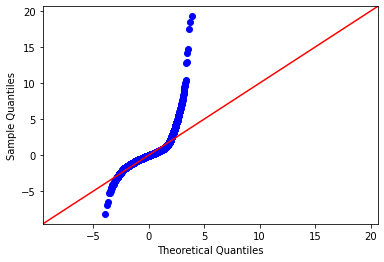

In [53]:
# Run regression with standardized variables. See if there is any differernce
model_summary(df_scaled, X_feats, 'price')

Confirmed that standardized yields the same results as non-standardized

In [54]:
# Scale Price and add onto outlier df
df_scaled2 = df_scaled.copy()

In [55]:
df_scaled2['price'] = scaler.fit_transform(df_scaled2[['price']])
df_scaled2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basementyes,total_rooms,living_vs_neighbor,lot_vs_neighbor,live_lot,renovated_yes
0,7129300520,2014-10-13,-0.86899,-0.41185,-1.45459,-0.98204,-0.22816,-0.91774,0.00000,-0.30530,-0.63136,-0.56451,-0.73673,0.0,-0.54875,0.00000,98178,47.51120,-122.25700,-0.94499,-0.26054,0,-1.01840,-0.53992,-0.10418,-0.42942,0
1,6414100192,2014-12-09,-0.00863,-0.41185,0.17194,0.53098,-0.18985,0.93402,0.00000,-0.30530,-0.63136,-0.56451,0.45812,400.0,-0.68492,1991.00000,98125,47.72100,-122.31900,-0.43431,-0.18785,1,-0.16385,1.45891,-0.14459,0.11312,1
2,5631500400,2015-02-25,-0.98304,-1.51952,-1.45459,-1.42833,-0.12349,-0.91774,0.00000,-0.30530,-0.63136,-1.41822,-1.23157,0.0,-1.29771,0.00000,98028,47.73790,-122.23300,1.06855,-0.17239,0,-1.70204,-2.40571,0.08271,-0.91929,0
3,2487200875,2014-12-09,0.17101,0.69582,1.14785,-0.13301,-0.24380,-0.91774,0.00000,-0.30530,2.44799,-0.56451,-0.89363,910.0,-0.20831,0.00000,98136,47.52080,-122.39300,-0.91581,-0.28429,1,1.03251,1.21055,-0.10418,0.25105,0
4,1954400510,2015-02-18,-0.08484,-0.41185,-0.15337,-0.43779,-0.16969,-0.91774,0.00000,-0.30530,-0.63136,0.28920,-0.13327,0.0,0.54065,0.00000,98074,47.61680,-122.04500,-0.27381,-0.19282,0,-0.33476,-0.37525,-0.04439,-0.43287,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21574,7430200100,2014-05-14,1.84764,0.69582,1.79846,3.07807,-0.13687,0.00814,0.00000,-0.30530,-0.63136,2.85033,1.59263,1800.0,1.22152,0.00000,98074,47.65020,-122.06600,3.75328,-0.06272,1,1.37433,0.07260,-0.21796,0.72628,0
21577,8672200110,2015-03-17,1.49380,1.80349,2.12377,2.27258,-0.16819,0.93402,0.00000,2.31279,-0.63136,1.99662,2.87197,0.0,1.18748,0.00000,98056,47.53540,-122.18100,1.52087,-0.17539,0,2.22888,1.00777,-0.08840,0.69749,0
21581,191100405,2015-04-21,2.82749,0.69582,1.47316,1.44532,-0.12048,0.93402,0.00000,-0.30530,-0.63136,1.99662,1.95471,0.0,1.22152,0.00000,98040,47.56530,-122.22300,0.44114,-0.09700,0,1.20342,1.36015,-0.10418,0.04593,0
21584,249000205,2014-10-15,2.71862,1.80349,2.12377,2.59913,-0.16949,0.93402,0.00000,-0.30530,-0.63136,2.85033,3.23404,0.0,1.25557,0.00000,98004,47.63210,-122.20000,1.15610,-0.13943,0,2.22888,1.73121,-0.18016,0.84801,0


In [56]:
cols_to_check = ['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'view', 'condition', 'grade',
       'sqft_above', 'yr_built', 'sqft_living15', 'sqft_lot15', 
       'total_rooms', 'living_vs_neighbor', 'lot_vs_neighbor', 'live_lot']

In [57]:
outliers_z = pd.DataFrame()

for col in cols_to_check:
    outliers_z[col] = df_scaled2[col].abs()>3

outliers_z['total'] = outliers_z.any(axis=1)
df_scaledz_orem = df_scaled[~outliers_z['total']].copy()

In [58]:
df_scaledz_orem.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basementyes,total_rooms,living_vs_neighbor,lot_vs_neighbor,live_lot,renovated_yes
count,18739.00000,18739.00000,18739.00000,18739.00000,18739.00000,18739.00000,18739.00000,18739.00000,18739.00000,18739.00000,18739.00000,18739.00000,18739.00000,18739.00000,18739.00000,18739.00000,18739.00000,18739.00000,18739.00000,18739.00000,18739.00000,18739.00000,18739.00000,18739.00000,18739.00000
mean,4642413539.57815,483952.00406,-0.04684,-0.11802,-0.13537,-0.12247,-0.08184,0.00027,-0.17642,0.02538,-0.11964,-0.11325,-0.04140,59.32921,98077.57025,47.55865,-122.21411,-0.09102,-0.12234,0.36501,-0.09092,-0.09671,-0.05894,-0.08101,0.02972
std,2864427156.31319,234698.26149,0.93754,0.89297,0.80788,0.26986,0.95007,0.01633,0.54277,0.99882,0.87434,0.84950,0.98689,338.99128,53.41876,0.14070,0.13789,0.87702,0.33910,0.48145,0.91097,0.80957,0.27328,0.77142,0.16983
min,1000102.00000,82500.00000,-2.62718,-2.10519,-1.86373,-0.34553,-0.91774,0.00000,-0.30530,-2.17104,-2.27193,-1.71434,-2.42115,0.00000,98001.00000,47.15590,-122.51100,-1.99554,-0.44323,0.00000,-2.72750,-2.43218,-0.79723,-1.17798,0.00000
25%,2202500202.50000,312000.00000,-0.41185,-0.80398,-0.74257,-0.24249,-0.91774,0.00000,-0.30530,-0.63136,-0.56451,-0.74880,-0.68492,0.00000,98033.00000,47.46290,-122.32600,-0.74072,-0.28064,0.00000,-0.67658,-0.56570,-0.14893,-0.60972,0.00000
50%,4019301386.00000,434975.00000,-0.41185,-0.15337,-0.25275,-0.18364,-0.91774,0.00000,-0.30530,-0.63136,-0.56451,-0.33845,0.02999,0.00000,98065.00000,47.56950,-122.22800,-0.25922,-0.19187,0.00000,0.00706,-0.16707,-0.10418,-0.29794,0.00000
75%,7348200155.00000,600000.00000,0.69582,0.49724,0.36770,-0.12246,0.93402,0.00000,-0.30530,0.90831,0.28920,0.37364,0.77895,0.00000,98117.00000,47.68050,-122.12800,0.42655,-0.11180,1.00000,0.69069,0.25755,-0.04133,0.24014,0.00000
max,9900000190.00000,1640000.00000,2.91116,2.77438,2.94745,2.87196,2.78577,1.00000,2.31279,2.44799,2.85033,2.99266,1.49387,2015.00000,98199.00000,47.77760,-121.31500,2.99455,2.96184,1.00000,2.91252,2.99458,2.93377,2.99903,1.00000


In [59]:
print(f'Num observations before dropping with Z-score: {len(df_scaled2)}')
print('----Dropping all rows where an outlier occurrs accross columns----')
print(f'Num observations after dropping with Z-score: {len(df_scaledz_orem)}')
print(f'Num observations removed: {len(df_scaled2)-len(df_scaledz_orem)}')
print(f'Num observations removed as percent of original DF: {round(100*float(((len(df_scaled2)-len(df_scaledz_orem))/len(df_scaled2))),2)}%')

Num observations before dropping with Z-score: 21387
----Dropping all rows where an outlier occurrs accross columns----
Num observations after dropping with Z-score: 18739
Num observations removed: 2648
Num observations removed as percent of original DF: 12.38%


In [60]:
print(f"Max price observation: {df_scaledz_orem['price'].max()}")
print(f"Min price observation: {df_scaledz_orem['price'].min()}")

Max price observation: 1640000.0
Min price observation: 82500.0


In [61]:
df_scaledz_orem.drop('sqft_basement', axis=1, inplace=True)

In [62]:
# Run regression to check QQ Plot

X_ztarg = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'basementyes', 'total_rooms',
       'living_vs_neighbor', 'lot_vs_neighbor', 'live_lot']

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     1990.
Date:                Mon, 19 Apr 2021   Prob (F-statistic):               0.00
Time:                        08:57:40   Log-Likelihood:            -2.4732e+05
No. Observations:               18739   AIC:                         4.947e+05
Df Residuals:                   18717   BIC:                         4.949e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           4.016e+06   2.05e+06      1.957      0.050   -6833.661    8.04e+06
bedrooms           -1.132e+04   1157.201     -9.786      0.000   -1.36e+04   -9056.338
bathrooms           1.776e+04   1647.784     10.775      0.000    1.45e+04     2.1e+04
sqft_living         6.617e+04   7532.499      8.785      0.000    5.14e+04    8.09e+04
sqft_lot            1.221e+04   9876.679      1.236      0.216   -7149.905    3.16e+04
floors              -414.5743   1735.966     -0.239      0.811   -3817.224    2988.076
waterfront          2.804e+05   5.88e+04      4.771      0.000    1.65e+05    3.96e+05
view                3.137e+04   1835.552     17.089      0.000    2.78e+04     3.5e+04
condition           1.861e+04   1073.157     17.338      0.000    1.65e+04    2.07e+04
grade               9.637e+04   1869.500     51.550      0.000    9.27e+04       1e+05
sqft_above          2.873e+04   4358.421      6.592      0.000    2.02e+04    3.73e+04
yr_built           -6.945e+04   1529.107    -45.419      0.000   -7.24e+04   -6.65e+04
yr_renovated          20.6159      2.954      6.980      0.000      14.826      26.406
zipcode             -379.2061     23.025    -16.469      0.000    -424.337    -334.075
lat                 5.459e+05   7417.778     73.599      0.000    5.31e+05     5.6e+05
long                -6.32e+04   9439.522     -6.696      0.000   -8.17e+04   -4.47e+04
sqft_living15       3.048e+04   5306.531      5.745      0.000    2.01e+04    4.09e+04
sqft_lot15         -1556.0571   7627.760     -0.204      0.838   -1.65e+04    1.34e+04
basementyes         1.284e+04   3834.671      3.347      0.001    5319.496    2.04e+04
total_rooms         2339.1522    716.156      3.266      0.001     935.422    3742.882
living_vs_neighbor -8634.9054   4391.496     -1.966      0.049   -1.72e+04     -27.175
lot_vs_neighbor     1.883e+04   5188.720      3.629      0.000    8661.320     2.9e+04
live_lot              3.7e+04   2068.873     17.885      0.000    3.29e+04    4.11e+04
==============================================================================
Omnibus:                     5315.173   Durbin-Watson:                   1.458
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25047.224
Skew:                           1.305   Prob(JB):                         0.00
Kurtosis:                       8.026   Cond. No.                     7.04e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.64e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

(<Figure size 360x360 with 1 Axes>,
 <AxesSubplot:xlabel='Price', ylabel='Residual'>)

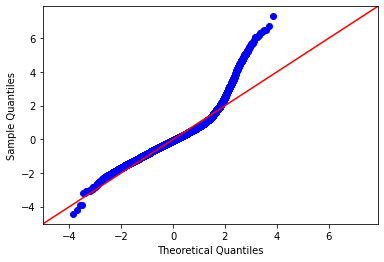

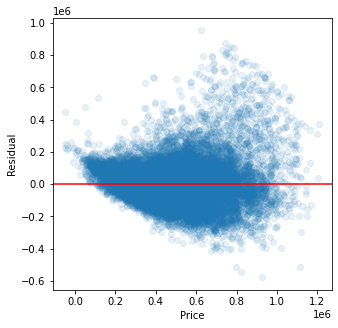

In [63]:
model_scaled = model_summary(df_scaledz_orem, X_ztarg, 'price')
sked_show(df_scaledz_orem, X_ztarg, model_scaled)

### Z-Score Outlier Removal Conclusion
- Our R^2 dropped to 0.691
- QQ plot is more normal
- Sqft_lot, floors, sqft_lot15 are insignificant
- Does not achieve homoscedasticity

## IQR Outlier Removal
- Checking if IQR outlier removal does a better job at normaling QQ plot and achieving homoscedasticity

In [64]:
def find_outliers_IQR(data):
    """Detects outliers using the 1.5*IQR thresholds.
    Returns a boolean Series where True=outlier"""
    res = data.describe()
    q1 = res['25%']
    q3 = res['75%']
    thresh = 1.5*(q3-q1)
    idx_outliers =(data < (q1-thresh)) | (data > (q3+thresh))
    return idx_outliers

In [65]:
df_iqr = df.copy()

In [66]:
df_iqr.drop(['sqft_basement'], axis=1, inplace=True)

In [67]:
# Only checking IQR outliers for columns that are continuous/ordinal

iqr_check = ['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot','sqft_above', 'yr_built',
       'sqft_living15', 'sqft_lot15', 'total_rooms',
       'living_vs_neighbor', 'lot_vs_neighbor', 'live_lot']

In [68]:
iqr_outliers = pd.DataFrame()
for col in iqr_check:
    iqr_outliers[col]=find_outliers_IQR(df_iqr[col])
iqr_outliers['total'] = iqr_outliers.any(axis=1)
df_iqr2 = df_iqr[~iqr_outliers['total']].copy()

In [69]:
print(f'Num observations before dropping with IQR: {len(df_iqr)}')
print(f'Num observations after dropping with IQR: {len(df_iqr2)}')
print(f'Num observations removed: {len(df_iqr)-len(df_iqr2)}')
print(f'Num observations removed as percent of original DF: {(len(df_iqr)-len(df_iqr2))/len(df_iqr):.2}%')

Num observations before dropping with IQR: 21387
Num observations after dropping with IQR: 13389
Num observations removed: 7998
Num observations removed as percent of original DF: 0.37%


In [70]:
print(f"Max price outliers removed: {df_iqr2['price'].max()}")
print(f"Min price outliers removed: {df_iqr2['price'].min()}")

Max price outliers removed: 1120000.0
Min price outliers removed: 81000.0


In [71]:
df_iqr2.columns
iqr_pred = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'basementyes', 'total_rooms',
       'living_vs_neighbor', 'lot_vs_neighbor', 'live_lot', 'renovated_yes']

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     1494.
Date:                Mon, 19 Apr 2021   Prob (F-statistic):               0.00
Time:                        08:57:41   Log-Likelihood:            -1.7382e+05
No. Observations:               13389   AIC:                         3.477e+05
Df Residuals:                   13366   BIC:                         3.479e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.079e+07   2.01e+06      5.376      0.000    6.86e+06    1.47e+07
bedrooms           -1.074e+04   1417.675     -7.577      0.000   -1.35e+04   -7963.423
bathrooms           1.269e+04   1832.725      6.926      0.000    9100.199    1.63e+04
sqft_living           33.1017     10.252      3.229      0.001      13.006      53.197
sqft_lot              -8.8020      2.871     -3.066      0.002     -14.429      -3.175
floors              8522.9111   3307.358      2.577      0.010    2040.021     1.5e+04
waterfront          1.773e+05   3.26e+04      5.445      0.000    1.13e+05    2.41e+05
view                3.315e+04   1771.516     18.714      0.000    2.97e+04    3.66e+04
condition           3.054e+04   1556.930     19.614      0.000    2.75e+04    3.36e+04
grade                6.86e+04   1636.795     41.911      0.000    6.54e+04    7.18e+04
sqft_above            26.1142      5.581      4.679      0.000      15.175      37.054
yr_built           -2228.5564     54.100    -41.193      0.000   -2334.601   -2122.512
yr_renovated        2585.2945    352.531      7.334      0.000    1894.285    3276.304
zipcode             -298.2342     21.562    -13.832      0.000    -340.499    -255.970
lat                 5.302e+05   6959.387     76.192      0.000    5.17e+05    5.44e+05
long                2.403e+04   9206.252      2.610      0.009    5982.584    4.21e+04
sqft_living15         80.5553      9.799      8.220      0.000      61.347      99.763
sqft_lot15             6.2593      3.000      2.087      0.037       0.380      12.139
basementyes         1.875e+04   3823.721      4.904      0.000    1.13e+04    2.62e+04
total_rooms         1950.3309    925.392      2.108      0.035     136.433    3764.229
living_vs_neighbor  1.667e+04   1.77e+04      0.939      0.348   -1.81e+04    5.14e+04
lot_vs_neighbor     9.004e+04   2.41e+04      3.734      0.000    4.28e+04    1.37e+05
live_lot            1.316e+05   1.65e+04      7.972      0.000    9.92e+04    1.64e+05
renovated_yes      -5.122e+06   7.04e+05     -7.276      0.000    -6.5e+06   -3.74e+06
==============================================================================
Omnibus:                     1308.382   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2687.128
Skew:                           0.634   Prob(JB):                         0.00
Kurtosis:                       4.791   Cond. No.                     3.92e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.49e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

(<Figure size 360x360 with 1 Axes>,
 <AxesSubplot:xlabel='Price', ylabel='Residual'>)

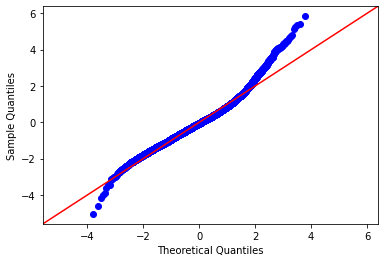

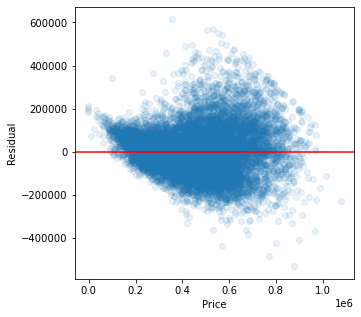

In [72]:
model_initiqr = model_summary(df_iqr2, iqr_pred, 'price')
sked_show(df_iqr2, iqr_pred, model_initiqr)

### IQR Outlier Removal Conclusion
- R^2 has increased to 0.71
- sqft_lot15 and living_vs_neighbor are insignificant
- QQ plot is significantly more normal. Small peak towards 2nd quantile
- homoscedasticity has improved because we have removed more outlier variables
- This model is working better but concerned that too much data has been removed (37%)

## Explore OHE Orindal Variables

In [73]:
# Does not look like clear linear relationship between ordinal variables
# yr_built does not have a linear relationship
# lot_vs_neighbor does not have a linear relationship

def ordinal_check(df, col, val='price'):
    fig, axes = plt.subplots(ncols=2, figsize=(20,6))
    sns.stripplot(data=df, x=col, y=val, ax=axes[0])
    sns.barplot(data=df, x=col, y=val, ax=axes[1])

    fig.suptitle(f'Z-{col.upper()} vs. Price')
    plt.show()
    print('------------------------------------------------------------')
    print(df[col].value_counts(1))

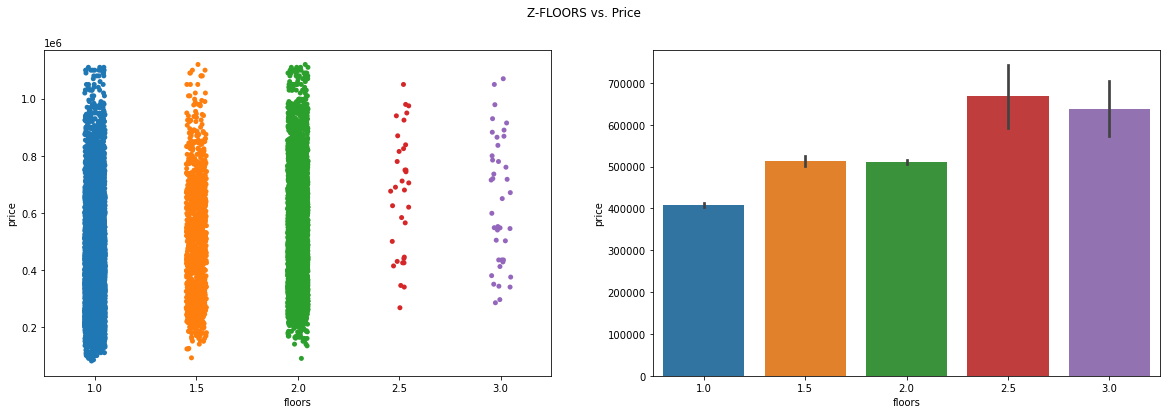

------------------------------------------------------------
1.00000   0.56853
2.00000   0.34155
1.50000   0.08447
3.00000   0.00299
2.50000   0.00246
Name: floors, dtype: float64


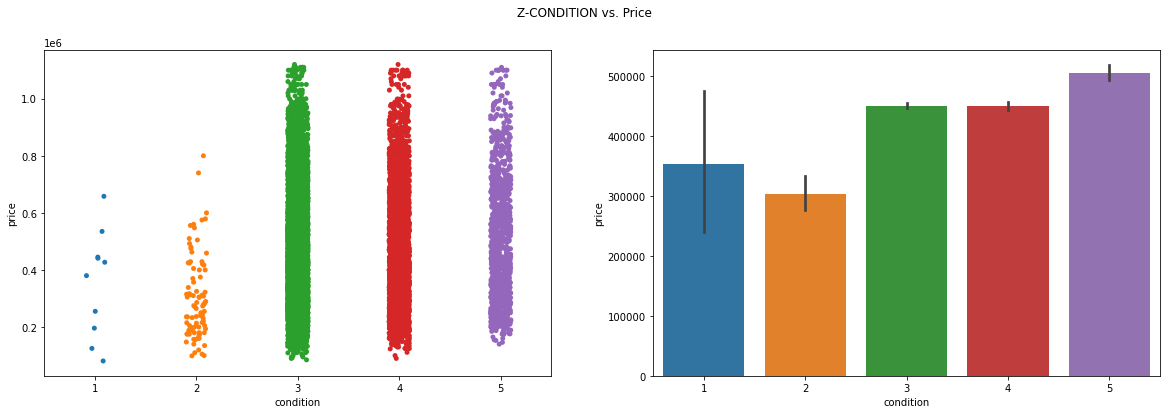

------------------------------------------------------------
3   0.62753
4   0.28494
5   0.07999
2   0.00680
1   0.00075
Name: condition, dtype: float64


In [74]:
for col in ['floors', 'condition']:
    ordinal_check(df_iqr2, col)

In [75]:
# OHE: Floors/condition
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')
encoder

OneHotEncoder(drop='first', sparse=False)

In [76]:
cat_cols=['floors', 'condition']

In [77]:
encoder.fit(df_iqr2[cat_cols])

ohe_vars = encoder.transform(df_iqr2[cat_cols])
encoder.get_feature_names(cat_cols)
cat_vars = pd.DataFrame(ohe_vars,columns=encoder.get_feature_names(cat_cols))

In [78]:
# Do this for formula OLS

name_dict = {}
for col in cat_vars.columns:
    name_dict[col]=col.replace('.','_')
name_dict

{'floors_1.5': 'floors_1_5',
 'floors_2.0': 'floors_2_0',
 'floors_2.5': 'floors_2_5',
 'floors_3.0': 'floors_3_0',
 'condition_2': 'condition_2',
 'condition_3': 'condition_3',
 'condition_4': 'condition_4',
 'condition_5': 'condition_5'}

In [79]:
cat_vars.rename(columns=name_dict, inplace=True)
cat_vars

,floors_1_5,floors_2_0,floors_2_5,floors_3_0,condition_2,condition_3,condition_4,condition_5
0,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
1,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
2,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
3,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
4,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...
13384,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
13385,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
13386,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
13387,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000


In [80]:
df_iqr2 = df_iqr2.reset_index()

In [81]:
df_iqr2.drop('index', axis=1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basementyes,total_rooms,living_vs_neighbor,lot_vs_neighbor,live_lot,renovated_yes
0,7129300520,2014-10-13,221900.00000,3,1.00000,1180,5650,1.00000,0.00000,0.00000,3,7,1180,1955,0.00000,98178,47.51120,-122.25700,1340,5650,0,4.00000,0.88060,1.00000,0.20885,0
1,6414100192,2014-12-09,538000.00000,3,2.25000,2570,7242,2.00000,0.00000,0.00000,3,7,2170,1951,1991.00000,98125,47.72100,-122.31900,1690,7639,1,5.25000,1.52071,0.94803,0.35487,1
2,2487200875,2014-12-09,604000.00000,4,3.00000,1960,5000,1.00000,0.00000,0.00000,5,7,1050,1965,0.00000,98136,47.52080,-122.39300,1360,5000,1,7.00000,1.44118,1.00000,0.39200,0
3,1954400510,2015-02-18,510000.00000,3,2.00000,1680,8080,1.00000,0.00000,0.00000,3,8,1680,1987,0.00000,98074,47.61680,-122.04500,1800,7503,0,5.00000,0.93333,1.07690,0.20792,0
4,1321400060,2014-06-27,257500.00000,3,2.25000,1715,6819,2.00000,0.00000,0.00000,3,7,1715,1995,0.00000,98003,47.30970,-122.32700,2238,6819,0,5.25000,0.76631,1.00000,0.25150,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13384,5556300109,2014-11-21,1080000.00000,5,3.50000,3230,7560,2.00000,0.00000,0.00000,3,10,3230,2007,0.00000,98052,47.64670,-122.11800,3230,8580,0,8.50000,1.00000,0.88112,0.42725,0
13385,1121000357,2014-08-27,1090000.00000,4,3.00000,3410,6541,2.00000,0.00000,2.00000,3,9,2680,2007,0.00000,98126,47.54160,-122.38000,2300,6345,1,7.00000,1.48261,1.03089,0.52133,0
13386,2428100080,2014-10-01,1060000.00000,4,3.00000,2990,6695,2.00000,0.00000,0.00000,3,10,2990,2014,0.00000,98075,47.58170,-122.04700,2760,6600,0,7.00000,1.08333,1.01439,0.44660,0
13387,8924100308,2015-02-03,1050000.00000,4,2.50000,3260,5974,2.00000,0.00000,1.00000,3,9,2820,2007,0.00000,98115,47.67720,-122.26700,2260,6780,1,6.50000,1.44248,0.88112,0.54570,0


In [82]:
df_iqr3 = pd.concat([df_iqr2, cat_vars], axis=1)

In [83]:
df_iqr3.drop('index', axis=1, inplace=True)

In [84]:
df_iqr3.drop(['floors', 'condition'], axis=1, inplace=True)

In [85]:
df_iqr3.columns
X_iqr_ohetargs = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'waterfront', 'view', 'grade', 'sqft_above', 'yr_built',
       'sqft_living15', 'sqft_lot15', 'basementyes', 'lat', 'long', 'zipcode',
       'total_rooms', 'living_vs_neighbor', 'lot_vs_neighbor', 'live_lot',
       'renovated_yes', 'floors_1_5', 'floors_2_0', 'floors_2_5', 'floors_3_0',
       'condition_2', 'condition_3', 'condition_4', 'condition_5']

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     1214.
Date:                Mon, 19 Apr 2021   Prob (F-statistic):               0.00
Time:                        08:57:42   Log-Likelihood:            -1.7383e+05
No. Observations:               13389   AIC:                         3.477e+05
Df Residuals:                   13361   BIC:                         3.479e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.099e+07   2.02e+06      5.436      0.000    7.03e+06     1.5e+07
bedrooms             -1.1e+04   1434.601     -7.669      0.000   -1.38e+04   -8190.320
bathrooms           1.355e+04   1846.498      7.338      0.000    9930.242    1.72e+04
sqft_living           33.1515     10.297      3.219      0.001      12.967      53.336
sqft_lot              -8.3860      2.876     -2.916      0.004     -14.023      -2.749
waterfront          1.668e+05   3.27e+04      5.098      0.000    1.03e+05    2.31e+05
view                3.287e+04   1773.881     18.528      0.000    2.94e+04    3.63e+04
grade               6.896e+04   1639.266     42.066      0.000    6.57e+04    7.22e+04
sqft_above            27.3336      5.603      4.878      0.000      16.351      38.317
yr_built           -2227.4284     59.263    -37.585      0.000   -2343.593   -2111.264
sqft_living15         80.7038      9.825      8.214      0.000      61.445      99.963
sqft_lot15             5.4835      3.009      1.823      0.068      -0.414      11.381
basementyes          1.86e+04   3829.436      4.856      0.000    1.11e+04    2.61e+04
lat                 5.284e+05   6979.865     75.705      0.000    5.15e+05    5.42e+05
long                2.767e+04   9251.223      2.991      0.003    9532.672    4.58e+04
zipcode             -293.9438     21.701    -13.545      0.000    -336.480    -251.408
total_rooms         2547.2981    928.401      2.744      0.006     727.500    4367.096
living_vs_neighbor  1.679e+04   1.78e+04      0.943      0.346   -1.81e+04    5.17e+04
lot_vs_neighbor     8.398e+04   2.42e+04      3.473      0.001    3.66e+04    1.31e+05
live_lot            1.249e+05   1.67e+04      7.497      0.000    9.23e+04    1.58e+05
renovated_yes       4.054e+04   6152.271      6.590      0.000    2.85e+04    5.26e+04
floors_1_5          3584.6312   3947.122      0.908      0.364   -4152.287    1.13e+04
floors_2_0          4048.4746   3456.091      1.171      0.241   -2725.952    1.08e+04
floors_2_5          3.186e+04   1.87e+04      1.700      0.089   -4875.663    6.86e+04
floors_3_0          9.493e+04   1.75e+04      5.434      0.000    6.07e+04    1.29e+05
condition_2        -8029.1610   3.53e+04     -0.228      0.820   -7.72e+04    6.11e+04
condition_3         1.355e+04   3.36e+04      0.404      0.686   -5.23e+04    7.94e+04
condition_4         4.513e+04   3.36e+04      1.344      0.179   -2.07e+04    1.11e+05
condition_5         7.294e+04   3.37e+04      2.165      0.030    6902.379    1.39e+05
==============================================================================
Omnibus:                     1313.261   Durbin-Watson:                   1.865
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2692.025
Skew:                           0.637   Prob(JB):             

(<Figure size 360x360 with 1 Axes>,
 <AxesSubplot:xlabel='Price', ylabel='Residual'>)

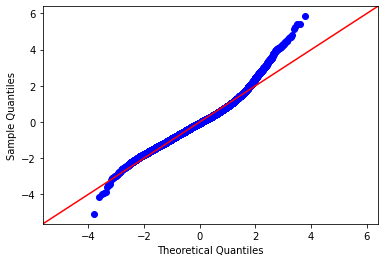

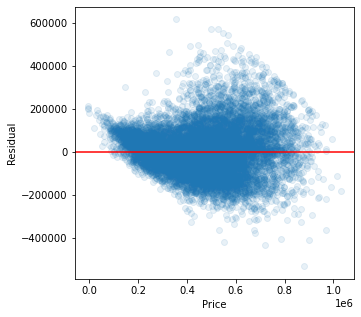

In [86]:
model_iqr_ohe = model_summary(df_iqr3, X_iqr_ohetargs, 'price')
sked_show(df_iqr3, X_iqr_ohetargs, model_iqr_ohe)

### OHE Ordinal Conclusion
- R^2 of 0.71
- Majority of the OHE variables are not statistically significant so may drop them
- QQ plot looks normal
- Homoscedasticity looks passable

## Check assumptions of multicollinearity and correlation

In [87]:
#https://nbviewer.jupyter.org/github/flatiron-school/Online-DS-FT-022221-Cohort-Notes/blob/master/Phase_2/topic_19_part1_multiple_regression/topic_19_Multiple_Regression_v2-SG.ipynb

df_iqr2.corr()['price'].round(2).sort_values(ascending=False)

price                 1.00000
grade                 0.58000
sqft_living           0.57000
sqft_living15         0.56000
lat                   0.48000
sqft_above            0.44000
live_lot              0.40000
bathrooms             0.38000
total_rooms           0.37000
bedrooms              0.27000
floors                0.26000
view                  0.24000
basementyes           0.19000
living_vs_neighbor    0.18000
renovated_yes         0.09000
yr_renovated          0.09000
condition             0.07000
waterfront            0.04000
long                  0.04000
index                 0.04000
id                    0.03000
zipcode               0.01000
sqft_lot15           -0.01000
lot_vs_neighbor      -0.01000
yr_built             -0.02000
sqft_lot             -0.02000
Name: price, dtype: float64

<AxesSubplot:>

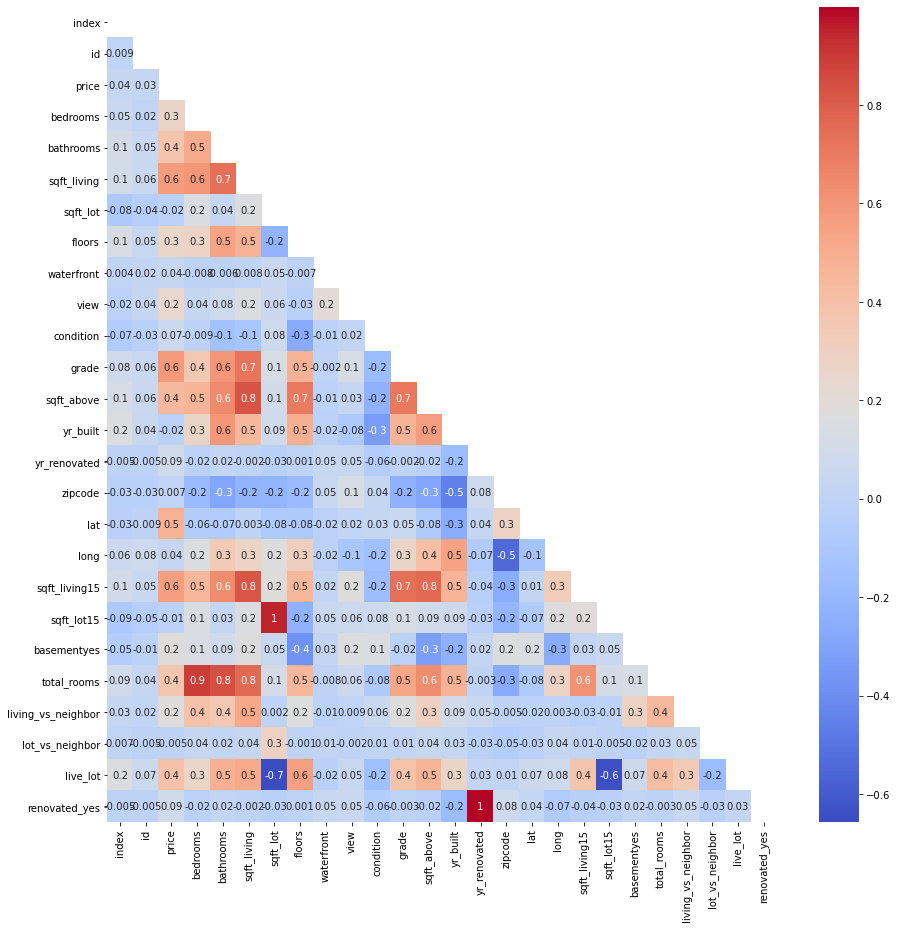

In [88]:
# https://heartbeat.fritz.ai/seaborn-heatmaps-13-ways-to-customize-correlation-matrix-visualizations-f1c49c816f07
corr2 = df_iqr2.corr()

fig, ax = plt.subplots(figsize=(15,15))
matrix = np.triu(corr2)
sns.heatmap(corr2,cmap="coolwarm", annot=True, fmt='.1g', mask=matrix)

In [89]:
def corr_finder(df):
    df_corr = df.corr().abs().stack().reset_index().sort_values(0, ascending=False)
    df_corr['pairs'] = list(zip(df_corr.level_0, df_corr.level_1))
    df_corr.set_index(['pairs'], inplace = True)
    df_corr.drop(columns=['level_1', 'level_0'], inplace = True)

    # # cc for correlation coefficient
    df_corr.columns = ['cc']
    df_corr.drop_duplicates(inplace=True)

    return df_corr[(df_corr.cc>.75) & (df_corr.cc<1)]

In [90]:
#https://github.com/learn-co-curriculum/dsc-multicollinearity-of-features-lab/tree/solution
corr_finder(df_iqr2)

,cc
pairs,
"(yr_renovated, renovated_yes)",0.99997
"(sqft_lot15, sqft_lot)",0.95056
"(total_rooms, bedrooms)",0.89193
"(total_rooms, bathrooms)",0.84303
"(sqft_living, sqft_above)",0.82733
"(sqft_living15, sqft_living)",0.82134
"(sqft_above, sqft_living15)",0.76633
"(sqft_living, total_rooms)",0.76241


Methodology will be to check each pair for correlation with price and drop the feature that 
has a lower correlation with price

- yr_renovated, renovated_yes: DROP - yr_renovated (should be dropped anyway)
- sqft_lot, sqft_lot15: DROP - sqft_lot15
- total_rooms, bedrooms: DROP - total rooms because it takes away from nuance of bath/bed
- bathrooms, total_rooms: DROP - total rooms because it takes away from nuance of bath/bed
- sqft_living, sqft_above: DROP - sqft_above
- sqft_living, sqft_living15: DROP - sqft_living_15
- sqft_above, sqft_living15: DROP - sqft_living_15
- sqft_living, total_rooms: DROP - total_rooms

In [91]:
df_iqr_nocolin = df_iqr2.copy()

In [92]:
cols_to_drop = ['index','yr_renovated', 'sqft_lot15', 'total_rooms', 'sqft_above', 'sqft_living15']

In [93]:
df_iqr_nocolin.drop(columns=cols_to_drop, axis=1, inplace=True)

In [94]:
df_iqr_nocolin.columns
X_nocolin_targs = ['bedrooms', 'bathrooms', 'sqft_living', 'zipcode', 'lat', 'long',
       'sqft_lot', 'waterfront', 'floors','view', 'condition', 'grade',
       'yr_built', 'basementyes', 'living_vs_neighbor', 'lot_vs_neighbor',
       'live_lot', 'renovated_yes']

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     1797.
Date:                Mon, 19 Apr 2021   Prob (F-statistic):               0.00
Time:                        08:57:44   Log-Likelihood:            -1.7390e+05
No. Observations:               13389   AIC:                         3.478e+05
Df Residuals:                   13370   BIC:                         3.480e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.191e+07   2.02e+06      5.911      0.000    7.96e+06    1.59e+07
bedrooms           -7817.3073   1544.270     -5.062      0.000   -1.08e+04   -4790.320
bathrooms           1.595e+04   2529.363      6.308      0.000     1.1e+04    2.09e+04
sqft_living          128.6500      3.609     35.645      0.000     121.575     135.725
zipcode             -300.7249     21.672    -13.876      0.000    -343.205    -258.245
lat                 5.292e+05   6991.353     75.687      0.000    5.15e+05    5.43e+05
long                2.931e+04   9235.694      3.174      0.002    1.12e+04    4.74e+04
sqft_lot              -2.5561      0.687     -3.723      0.000      -3.902      -1.210
waterfront          1.692e+05   3.27e+04      5.172      0.000    1.05e+05    2.33e+05
floors              1.365e+04   3129.711      4.361      0.000    7515.152    1.98e+04
view                3.275e+04   1766.349     18.543      0.000    2.93e+04    3.62e+04
condition           2.979e+04   1557.271     19.130      0.000    2.67e+04    3.28e+04
grade               7.188e+04   1617.272     44.444      0.000    6.87e+04     7.5e+04
yr_built           -2229.8463     54.306    -41.060      0.000   -2336.295   -2123.398
basementyes         6889.2197   2559.441      2.692      0.007    1872.353    1.19e+04
living_vs_neighbor -1.233e+05   5898.776    -20.903      0.000   -1.35e+05   -1.12e+05
lot_vs_neighbor     4.218e+04   8755.287      4.817      0.000     2.5e+04    5.93e+04
live_lot            1.282e+05   1.59e+04      8.056      0.000     9.7e+04    1.59e+05
renovated_yes       3.964e+04   6145.803      6.450      0.000    2.76e+04    5.17e+04
==============================================================================
Omnibus:                     1363.317   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2837.707
Skew:                           0.652   Prob(JB):                         0.00
Kurtosis:                       4.840   Cond. No.                     2.17e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.17e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(<Figure size 360x360 with 1 Axes>,
 <AxesSubplot:xlabel='Price', ylabel='Residual'>)

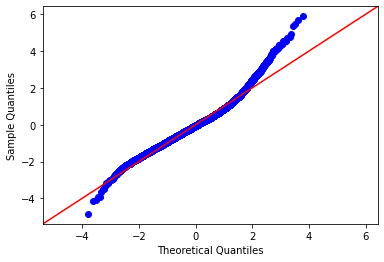

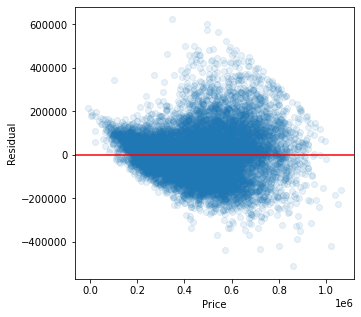

In [95]:
df_iqr_mult = model_summary(df_iqr_nocolin, X_nocolin_targs, 'price')
sked_show(df_iqr_nocolin, X_nocolin_targs, df_iqr_mult)

- R^2 of 0.708
- QQ plot looks normal
- No features with insignificant p-values
- homoscedasticity looks passable

Check Assumption of Linearity

In [96]:
# Figure out how to delete empty axis

def lin_check(df, cols, ncols=4, figsize=(20,15)):
    fig, axes = plt.subplots(nrows=(len(cols)//ncols) +1, ncols=ncols, figsize=figsize)
    for ax, col in zip(axes.flatten(), cols):
        sns.regplot(data=df, x=col, y='price', ax=ax, line_kws={'color': 'red'})
        ax.set_title(f'{col} vs. price')
    fig.tight_layout()

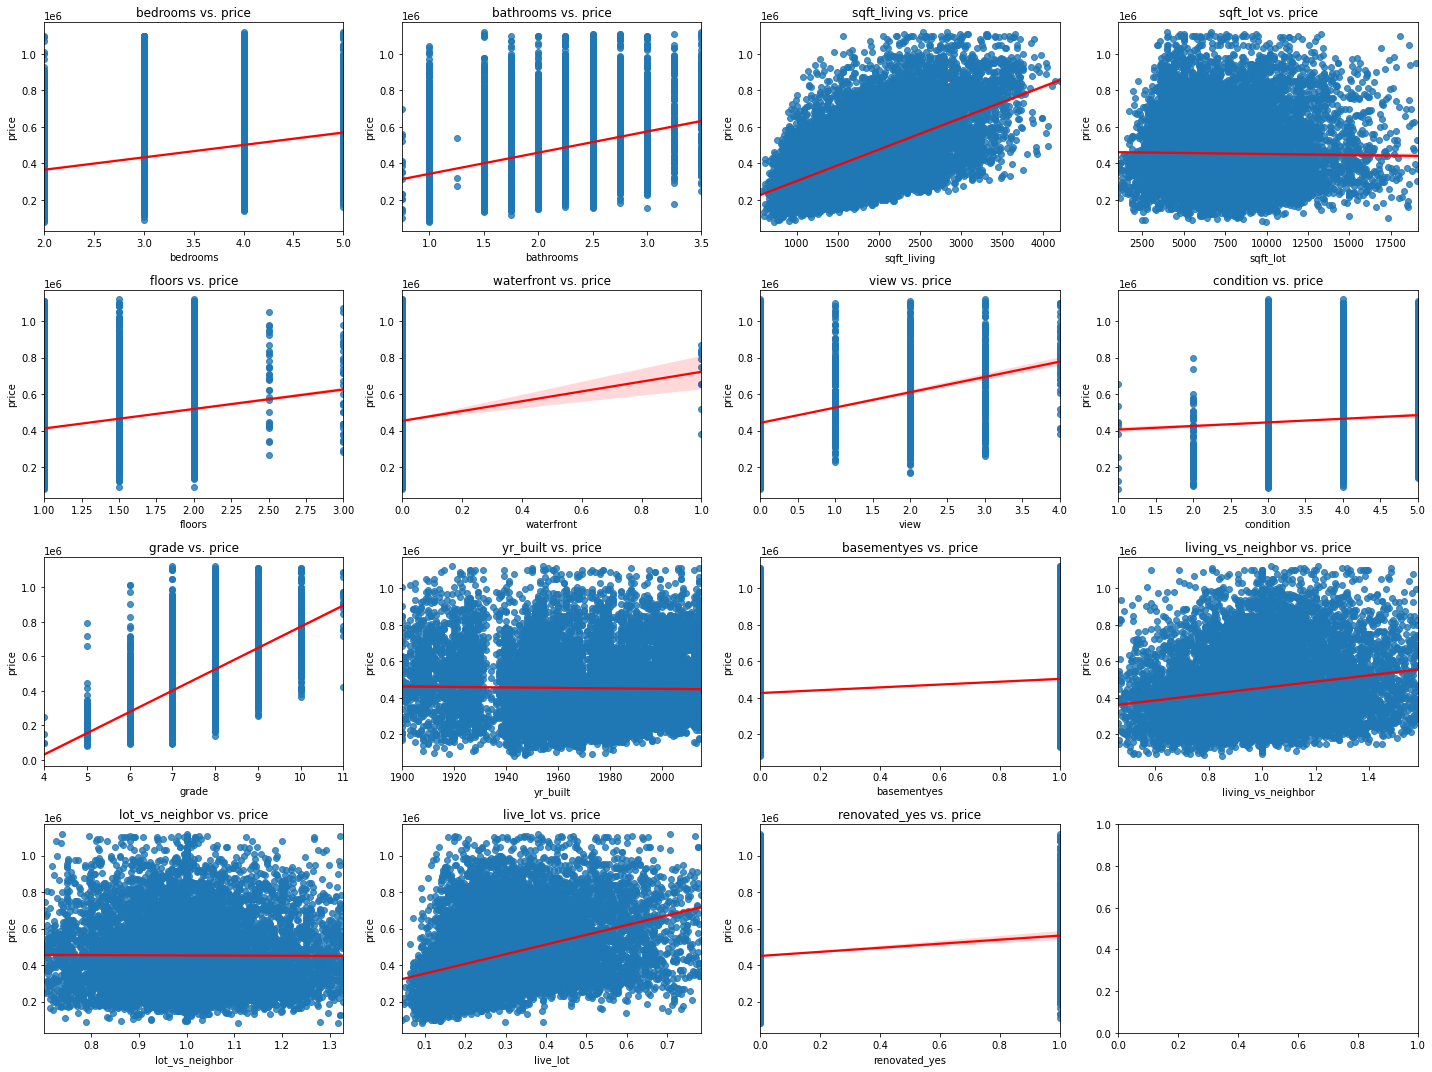

In [97]:
nocolin_cols = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'yr_built', 'basementyes', 'living_vs_neighbor', 'lot_vs_neighbor',
       'live_lot', 'renovated_yes']
## commenting out for speed

lin_check(df_iqr_nocolin, nocolin_cols)

- sqft_lot does not have a linear relationship
- yr_built does not have a linear relationship
- lot_vs_neighbor does not have a linear relationship

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     1807.
Date:                Mon, 19 Apr 2021   Prob (F-statistic):               0.00
Time:                        08:59:46   Log-Likelihood:            -1.7471e+05
No. Observations:               13389   AIC:                         3.495e+05
Df Residuals:                   13373   BIC:                         3.496e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -2.06e+07   1.97e+06    -10.461      0.000   -2.45e+07   -1.67e+07
bedrooms           -5233.2656   1639.135     -3.193      0.001   -8446.202   -2020.329
bathrooms          -2.184e+04   2505.072     -8.719      0.000   -2.68e+04   -1.69e+04
sqft_living          124.2569      3.356     37.026      0.000     117.679     130.835
lat                 5.948e+05   7231.706     82.252      0.000    5.81e+05    6.09e+05
long               -8.316e+04   9365.938     -8.879      0.000   -1.02e+05   -6.48e+04
floors              1.111e+04   3316.379      3.351      0.001    4613.280    1.76e+04
waterfront           1.48e+05   3.47e+04      4.261      0.000    7.99e+04    2.16e+05
view                3.928e+04   1869.098     21.018      0.000    3.56e+04    4.29e+04
condition           4.881e+04   1576.715     30.960      0.000    4.57e+04    5.19e+04
grade               6.142e+04   1695.199     36.232      0.000    5.81e+04    6.47e+04
zipcode             -185.0793     22.827     -8.108      0.000    -229.824    -140.335
basementyes         2.005e+04   2693.687      7.443      0.000    1.48e+04    2.53e+04
living_vs_neighbor -1.188e+05   6256.580    -18.981      0.000   -1.31e+05   -1.06e+05
live_lot            1.677e+05   9111.159     18.405      0.000     1.5e+05    1.86e+05
renovated_yes       1.024e+05   6317.776     16.202      0.000       9e+04    1.15e+05
==============================================================================
Omnibus:                     1295.240   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2321.946
Skew:                           0.672   Prob(JB):                         0.00
Kurtosis:                       4.535   Cond. No.                     1.99e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.99e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

TypeError: object of type 'RegressionResultsWrapper' has no len()

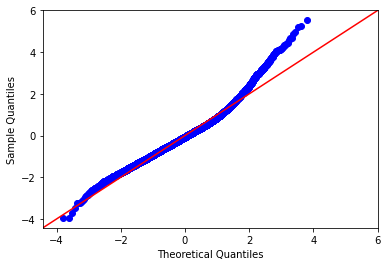

In [124]:
# comming out for speed
X_iqr_nolin = ['bedrooms', 'bathrooms', 'sqft_living', 'lat', 'long',
             'floors', 'waterfront', 'view', 'condition', 'grade', 'zipcode',
             'basementyes', 'living_vs_neighbor',
             'live_lot', 'renovated_yes']
df_iqr_nocolin = model_summary(df_iqr_nocolin, X_iqr_nolin, 'price')
sked_show(df_iqr_nocolin, X_iqr_nolin, df_iqr_nocolin)

### Linearity Conclusion
- R^2 has dropped to 0.67
- No insignificant p-values
- QQ plot looks normal
- Sked looks normal
- One of the features we dropped must have had a significant impact on our target variable

## Pivoting Back to Z-Score
- R^2 was reduced
- Testing if I can achieve similar results and drop less data

In [99]:
df_z = df_scaledz_orem.copy()
df_z.drop('yr_renovated', axis=1, inplace=True)

## Check for multicolinearity

Not going to OHE the variables that were unsuccesful in IQR method


In [125]:
# Check correlation
def initial_corr_check(df, col='price'):
    return df_z.corr()['price'].round(2).sort_values(ascending=False)
initial_corr_check(df_z)

price                 1.00000
grade                 0.63000
sqft_living           0.62000
sqft_living15         0.57000
sqft_above            0.52000
bathrooms             0.45000
total_rooms           0.43000
lat                   0.43000
bedrooms              0.31000
floors                0.28000
living_vs_neighbor    0.24000
live_lot              0.24000
view                  0.20000
basementyes           0.17000
sqft_lot              0.10000
renovated_yes         0.09000
sqft_lot15            0.09000
condition             0.05000
long                  0.04000
waterfront            0.03000
yr_built              0.03000
lot_vs_neighbor       0.03000
id                    0.00000
zipcode              -0.04000
Name: price, dtype: float64

In [101]:
def corr_triangle(df):
    corr2 = df.corr()

    fig, ax = plt.subplots(figsize=(15,15))
    matrix = np.triu(corr2)
    return sns.heatmap(corr2,cmap="coolwarm", annot=True, fmt='.1g', mask=matrix)

<AxesSubplot:>

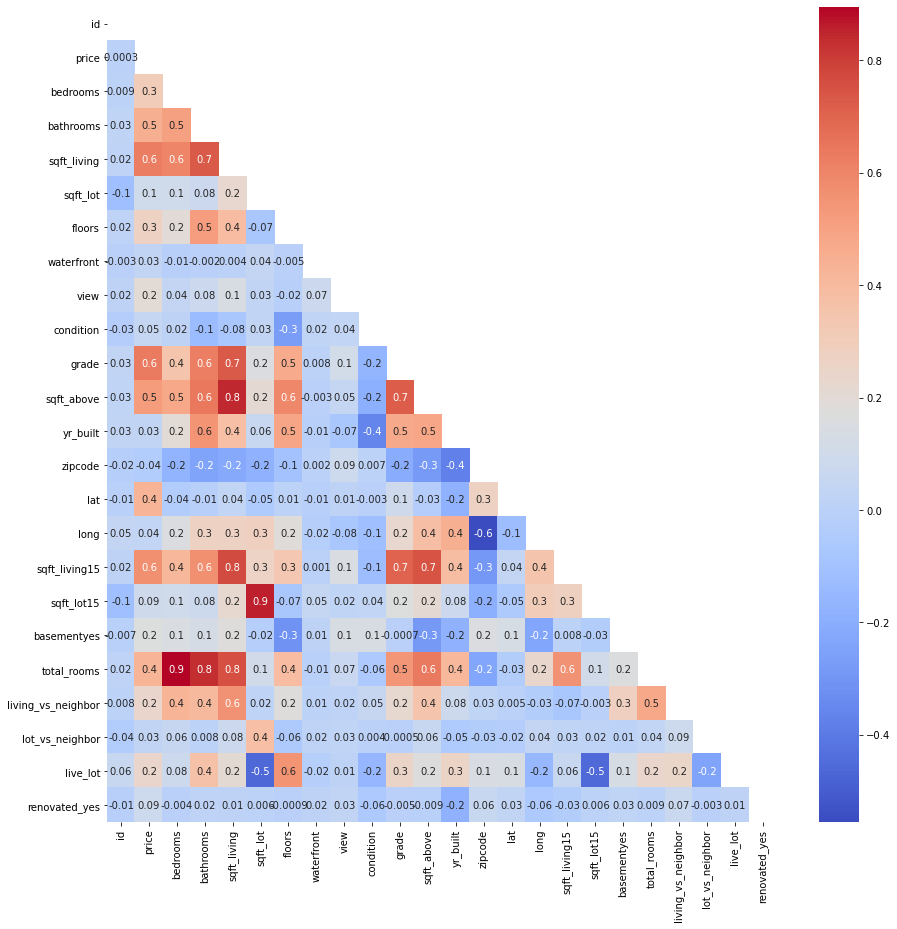

In [102]:
corr_triangle(df_z)

In [103]:
# To Drop based on mulitcolinearity:
# total_rooms, bedrooms -DROP total_rooms (nuance)
# sqft_lot, sqft_lot15 -DROP sqft_lot15
# sqft_living, sqft_above -DROP sqft_above
# bathrooms, total_rooms -DROP total_rooms(nuance)
# sqft_living, sqft_living15 -DROP sqft_living15
# total_rooms, sqft_living -DROP total_rooms

corr_finder(df_z)

,cc
pairs,
"(total_rooms, bedrooms)",0.89598
"(sqft_lot, sqft_lot15)",0.85946
"(sqft_living, sqft_above)",0.84780
"(total_rooms, bathrooms)",0.83665
"(sqft_living, sqft_living15)",0.77120
"(total_rooms, sqft_living)",0.75943


In [104]:
# Confirm no more multicolinearity issues

corr_finder(df_z.drop(['total_rooms', 'sqft_lot15', 'sqft_above', 'sqft_living15'], axis=1))

,cc
pairs,


<AxesSubplot:xlabel='total_rooms', ylabel='price'>

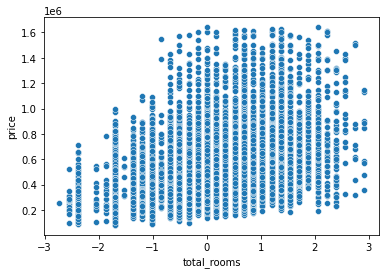

In [105]:
# It really doesn't look like there's a linear relationship between total rooms and price

sns.scatterplot(data=df_z, x='total_rooms', y='price', ci=68)

In [106]:
df_z_multirem = df_z.copy()

In [107]:
df_z_multirem.drop(['total_rooms', 'sqft_lot15', 'sqft_above', 'sqft_living15'], axis=1, inplace=True)

In [108]:
df_z_multirem.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'yr_built', 'zipcode', 'lat', 'long', 'basementyes',
       'living_vs_neighbor', 'lot_vs_neighbor', 'live_lot', 'renovated_yes'],
      dtype='object')

In [109]:
X_multirem_targ = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'yr_built', 'zipcode', 'lat', 'long', 'basementyes',
       'living_vs_neighbor', 'lot_vs_neighbor', 'live_lot', 'renovated_yes']

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     2307.
Date:                Mon, 19 Apr 2021   Prob (F-statistic):               0.00
Time:                        08:58:18   Log-Likelihood:            -2.4737e+05
No. Observations:               18739   AIC:                         4.948e+05
Df Residuals:                   18720   BIC:                         4.949e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           4.959e+06   2.05e+06      2.416      0.016    9.35e+05    8.98e+06
bedrooms           -9334.6716   1340.015     -6.966      0.000    -1.2e+04   -6708.121
bathrooms           1.906e+04   1899.762     10.035      0.000    1.53e+04    2.28e+04
sqft_living         1.283e+05   2639.145     48.618      0.000    1.23e+05    1.33e+05
sqft_lot            1.049e+04   4645.290      2.259      0.024    1387.974    1.96e+04
floors              3188.3390   1656.735      1.924      0.054     -59.012    6435.690
waterfront          2.871e+05   5.88e+04      4.880      0.000    1.72e+05    4.02e+05
view                3.077e+04   1832.840     16.789      0.000    2.72e+04    3.44e+04
condition             1.8e+04   1069.924     16.823      0.000    1.59e+04    2.01e+04
grade               9.956e+04   1841.327     54.071      0.000     9.6e+04    1.03e+05
yr_built           -6.969e+04   1531.649    -45.501      0.000   -7.27e+04   -6.67e+04
zipcode             -380.9131     23.048    -16.527      0.000    -426.090    -335.737
lat                  5.45e+05   7428.578     73.367      0.000     5.3e+05     5.6e+05
long               -5.727e+04   9414.086     -6.084      0.000   -7.57e+04   -3.88e+04
basementyes        -5138.9456   2586.979     -1.986      0.047   -1.02e+04     -68.231
living_vs_neighbor -3.315e+04   1610.973    -20.578      0.000   -3.63e+04      -3e+04
lot_vs_neighbor     1.991e+04   3850.502      5.170      0.000    1.24e+04    2.75e+04
live_lot            3.573e+04   1997.815     17.886      0.000    3.18e+04    3.96e+04
renovated_yes       4.104e+04   5905.364      6.949      0.000    2.95e+04    5.26e+04
==============================================================================
Omnibus:                     5305.167   Durbin-Watson:                   1.468
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25198.882
Skew:                           1.300   Prob(JB):                         0.00
Kurtosis:                       8.051   Cond. No.                     2.11e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.11e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(<Figure size 360x360 with 1 Axes>,
 <AxesSubplot:xlabel='Price', ylabel='Residual'>)

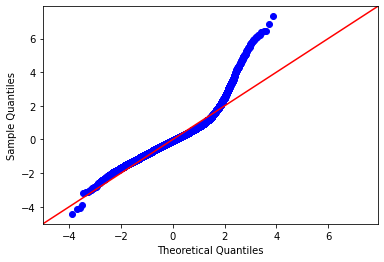

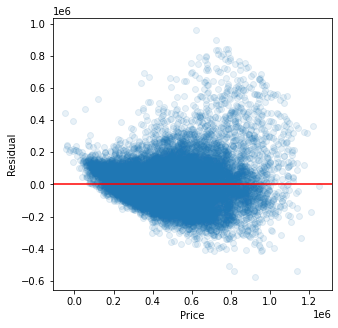

In [110]:
model_z_multirem = model_summary(df_z_multirem, X_multirem_targ, 'price')
sked_show(df_z_multirem, X_multirem_targ, model_z_multirem)

### Multicolinearity Assumptions Conclusion
- R^2 is 68.8
- No statistically insignificant features but floors, basement, and sqft loss are close to threshold
- QQ plot seems passable
- Skedacity vears upward as price increases

## Check for Linearity and possible OHE

In [111]:
df_z_multirem.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'yr_built', 'zipcode', 'lat', 'long', 'basementyes',
       'living_vs_neighbor', 'lot_vs_neighbor', 'live_lot', 'renovated_yes'],
      dtype='object')

In [112]:
## commenting out for speed
# z_multi_check = ['bedrooms', 'bathrooms', 'sqft_living',
#        'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
#        'yr_built', 'basementyes',
#        'living_vs_neighbor', 'lot_vs_neighbor', 'live_lot', 'renovated_yes']
# lin_check(df_z_multirem, z_multi_check)

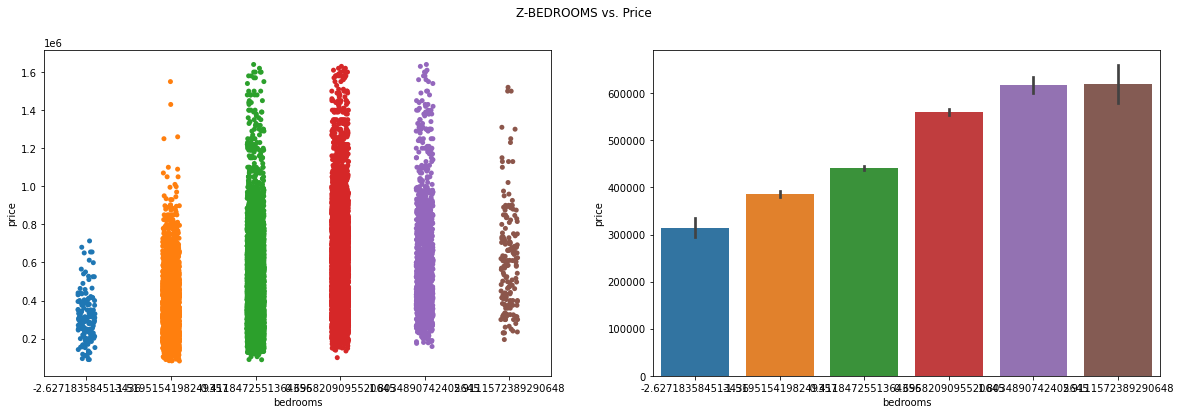

------------------------------------------------------------
-0.41185   0.46753
0.69582    0.31901
-1.51952   0.13064
1.80349    0.06569
2.91116    0.00881
-2.62718   0.00832
Name: bedrooms, dtype: float64
None
---------------------------------------------------------------------------------------


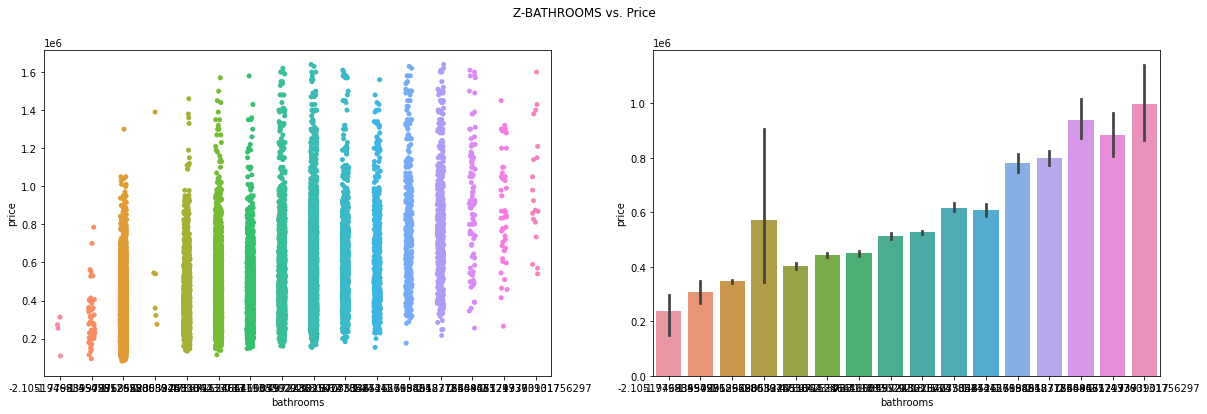

------------------------------------------------------------
0.49724    0.25594
-1.45459   0.19483
-0.47867   0.14953
0.17194    0.09600
-0.15337   0.09387
-0.80398   0.07108
0.82255    0.05326
1.14785    0.03004
1.79846    0.02497
1.47316    0.01953
2.12377    0.00438
-1.77989   0.00256
2.44907    0.00245
2.77438    0.00101
-1.12928   0.00032
-2.10519   0.00021
Name: bathrooms, dtype: float64
None
---------------------------------------------------------------------------------------


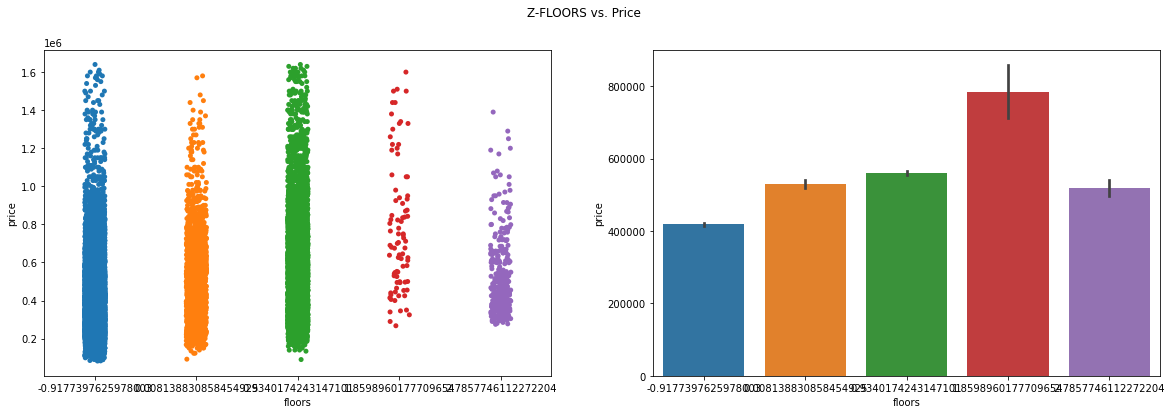

------------------------------------------------------------
-0.91774   0.52345
0.93402    0.36539
0.00814    0.08933
2.78577    0.01724
1.85990    0.00459
Name: floors, dtype: float64
None
---------------------------------------------------------------------------------------


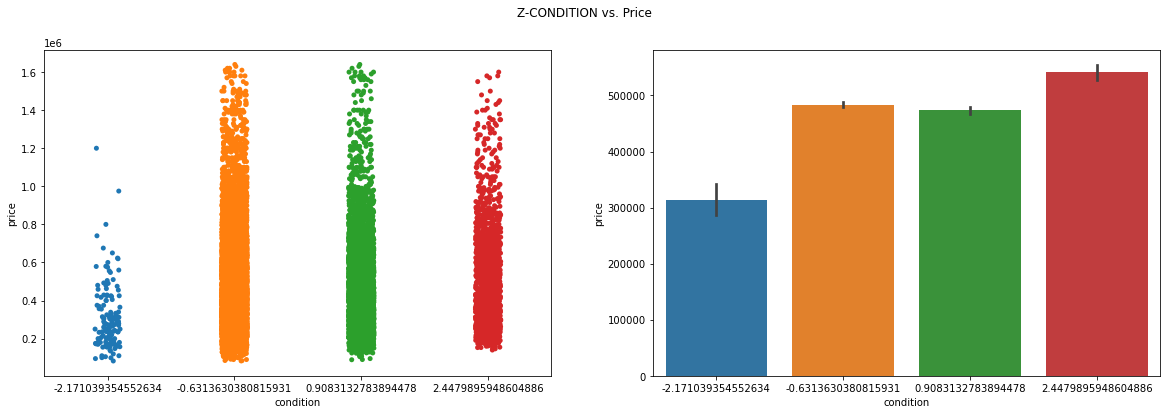

------------------------------------------------------------
-0.63136   0.63915
0.90831    0.27275
2.44799    0.08063
-2.17104   0.00747
Name: condition, dtype: float64
None
---------------------------------------------------------------------------------------


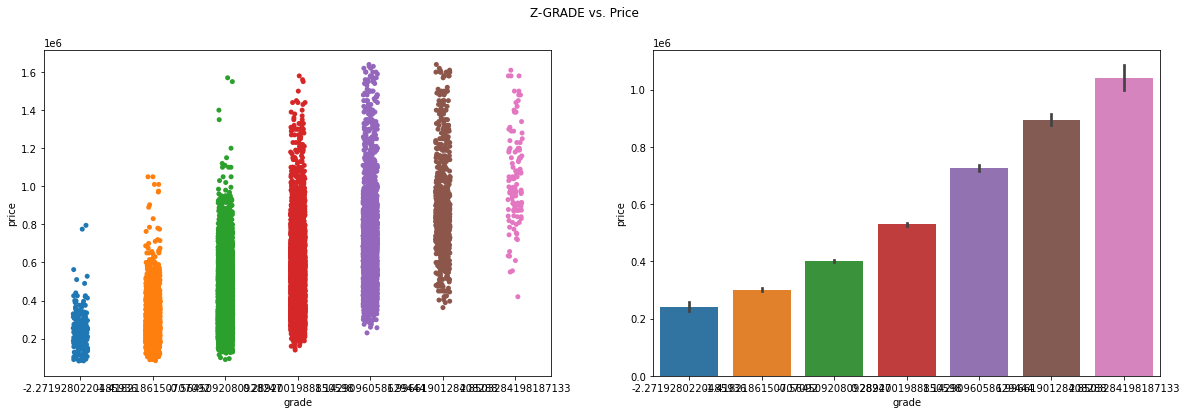

------------------------------------------------------------
-0.56451   0.44906
0.28920    0.28246
1.14291    0.11068
-1.41822   0.10166
1.99662    0.03869
-2.27193   0.01115
2.85033    0.00630
Name: grade, dtype: float64
None
---------------------------------------------------------------------------------------


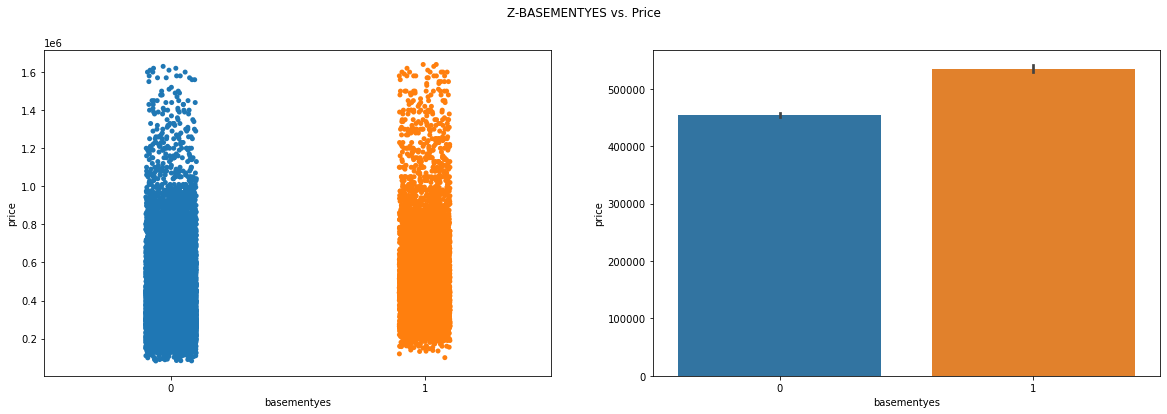

------------------------------------------------------------
0   0.63499
1   0.36501
Name: basementyes, dtype: float64
None
---------------------------------------------------------------------------------------


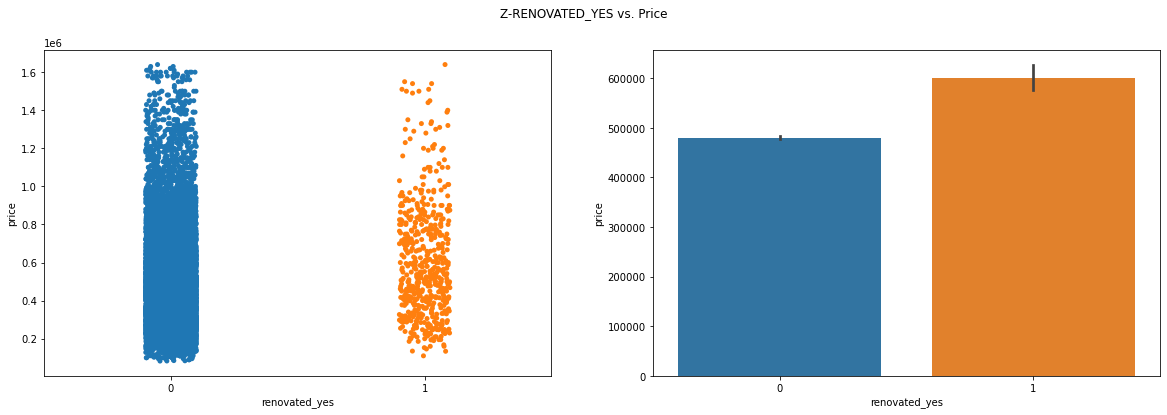

------------------------------------------------------------
0   0.97028
1   0.02972
Name: renovated_yes, dtype: float64
None
---------------------------------------------------------------------------------------


In [113]:
oridnal_cats = ['bedrooms', 'bathrooms', 'floors', 'condition', 'grade', 'basementyes', 'renovated_yes']
for col in oridnal_cats:
    print(ordinal_check(df_z_multirem, col))
    print('---------------------------------------------------------------------------------------')

Most of the data apppears ordinal, floor is in between

In [114]:
df_z_loc = df_z_multirem.copy()

In [115]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')
encoder
loc_col=['zipcode']
encoder.fit(df_z_loc[loc_col])

ohe_vars2 = encoder.transform(df_z_loc[loc_col])
encoder.get_feature_names(loc_col)
cat_vars2 = pd.DataFrame(ohe_vars2,columns=encoder.get_feature_names(loc_col))

In [116]:
df_z_loc = df_z_loc.reset_index()

In [117]:
df_z_loc2 = pd.concat([df_z_loc, cat_vars2], axis=1)

In [118]:
df_z_loc2.drop('zipcode', axis=1, inplace=True)

In [119]:
X_z_zip = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'waterfront', 'view', 'condition', 'grade',
       'basementyes', 'living_vs_neighbor',
       'live_lot', 'renovated_yes', 'zipcode_98002',
       'zipcode_98003', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006',
       'zipcode_98007', 'zipcode_98008', 'zipcode_98010', 'zipcode_98011',
       'zipcode_98014', 'zipcode_98019', 'zipcode_98022', 'zipcode_98023',
       'zipcode_98024', 'zipcode_98027', 'zipcode_98028', 'zipcode_98029',
       'zipcode_98030', 'zipcode_98031', 'zipcode_98032', 'zipcode_98033',
       'zipcode_98034', 'zipcode_98038', 'zipcode_98039', 'zipcode_98040',
       'zipcode_98042', 'zipcode_98045', 'zipcode_98052', 'zipcode_98053',
       'zipcode_98055', 'zipcode_98056', 'zipcode_98058', 'zipcode_98059',
       'zipcode_98065', 'zipcode_98070', 'zipcode_98072', 'zipcode_98074',
       'zipcode_98075', 'zipcode_98077', 'zipcode_98092', 'zipcode_98102',
       'zipcode_98103', 'zipcode_98105', 'zipcode_98106', 'zipcode_98107',
       'zipcode_98108', 'zipcode_98109', 'zipcode_98112', 'zipcode_98115',
       'zipcode_98116', 'zipcode_98117', 'zipcode_98118', 'zipcode_98119',
       'zipcode_98122', 'zipcode_98125', 'zipcode_98126', 'zipcode_98133',
       'zipcode_98136', 'zipcode_98144', 'zipcode_98146', 'zipcode_98148',
       'zipcode_98155', 'zipcode_98166', 'zipcode_98168', 'zipcode_98177',
       'zipcode_98178', 'zipcode_98188', 'zipcode_98198', 'zipcode_98199']

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     1155.
Date:                Mon, 19 Apr 2021   Prob (F-statistic):               0.00
Time:                        08:58:21   Log-Likelihood:            -2.4150e+05
No. Observations:               18739   AIC:                         4.832e+05
Df Residuals:                   18657   BIC:                         4.838e+05
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           3.335e+05   5231.768     63.751      0.000    3.23e+05    3.44e+05
bedrooms           -4799.7959    993.515     -4.831      0.000   -6747.175   -2852.417
bathrooms           1.159e+04   1298.460      8.926      0.000    9044.455    1.41e+04
sqft_living         1.358e+05   1989.241     68.292      0.000    1.32e+05     1.4e+05
sqft_lot            9088.8315   3433.998      2.647      0.008    2357.883    1.58e+04
waterfront          3.122e+05   4.39e+04      7.118      0.000    2.26e+05    3.98e+05
view                2.852e+04   1364.353     20.906      0.000    2.58e+04    3.12e+04
condition           1.737e+04    762.430     22.777      0.000    1.59e+04    1.89e+04
grade               5.778e+04   1367.940     42.239      0.000    5.51e+04    6.05e+04
basementyes        -1.958e+04   1668.359    -11.734      0.000   -2.28e+04   -1.63e+04
living_vs_neighbor -1.675e+04   1218.191    -13.748      0.000   -1.91e+04   -1.44e+04
live_lot           -2.295e+04   1388.951    -16.521      0.000   -2.57e+04   -2.02e+04
renovated_yes       4.874e+04   4204.833     11.591      0.000    4.05e+04     5.7e+04
zipcode_98002       2.332e+04   8761.321      2.661      0.008    6144.628    4.05e+04
zipcode_98003      -5676.1759   7829.908     -0.725      0.469    -2.1e+04    9671.157
zipcode_98004       6.196e+05   8452.354     73.308      0.000    6.03e+05    6.36e+05
zipcode_98005       3.232e+05   9507.683     33.989      0.000    3.05e+05    3.42e+05
zipcode_98006       2.621e+05   7254.603     36.122      0.000    2.48e+05    2.76e+05
zipcode_98007       2.568e+05   9800.795     26.205      0.000    2.38e+05    2.76e+05
zipcode_98008       2.409e+05   7946.681     30.314      0.000    2.25e+05    2.56e+05
zipcode_98010       7.886e+04   1.21e+04      6.506      0.000    5.51e+04    1.03e+05
zipcode_98011       1.404e+05   8736.400     16.074      0.000    1.23e+05    1.58e+05
zipcode_98014       1.016e+05    1.2e+04      8.457      0.000     7.8e+04    1.25e+05
zipcode_98019       8.452e+04   9098.027      9.290      0.000    6.67e+04    1.02e+05
zipcode_98022       2065.8914   9039.029      0.229      0.819   -1.57e+04    1.98e+04
zipcode_98023      -2.377e+04   6800.636     -3.495      0.000   -3.71e+04   -1.04e+04
zipcode_98024       1.446e+05   1.53e+04      9.473      0.000    1.15e+05    1.75e+05
zipcode_98027       1.877e+05   7563.515     24.814      0.000    1.73e+05    2.03e+05
zipcode_98028       1.313e+05   7830.483     16.762      0.000    1.16e+05    1.47e+05
zipcode_98029       2.276e+05   7677.976     29.650      0.000    2.13e+05    2.43e+05
zipcode_98030       1463.5199   8040.642      0.182      0.856   -1.43e+04    1.72e+04
zipcode_98031       7674.6113   7896.872      0.972      0.331   -7803.978    2.32e+04
zipcode_98032        611.8492   1.02e+

(<Figure size 360x360 with 1 Axes>,
 <AxesSubplot:xlabel='Price', ylabel='Residual'>)

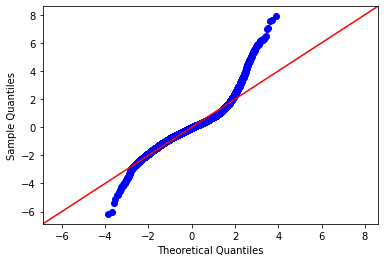

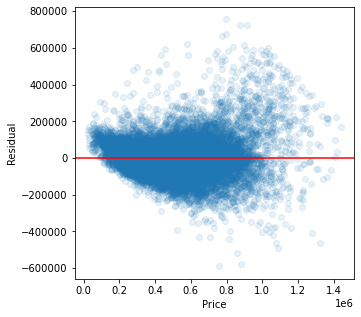

In [120]:
model_zip = model_summary(df_z_loc2, X_z_zip, 'price')
sked_show(df_z_loc2, X_z_zip, model_zip)

### Checking for Linearity Conclusion
- When adding zipcode, R^2 moves up to 0.834
- Floors are statistically insignificant
- Tried OHE and they came back as majority insignificant
- Dropped floors because no linear relationship
- Some zipcodes were statistically insignificant but enough to drop the variables
- QQ plot trails off 2 quantile
- Homoscedasticity breaks down around $1,000,000

## Invididually check for homoskedacicity per feature

bedrooms-----------------


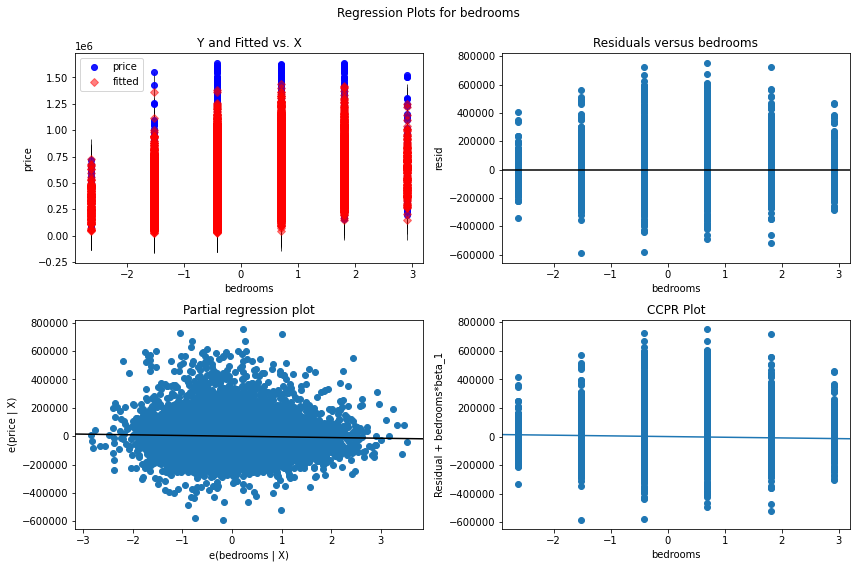

----------------------
bathrooms-----------------


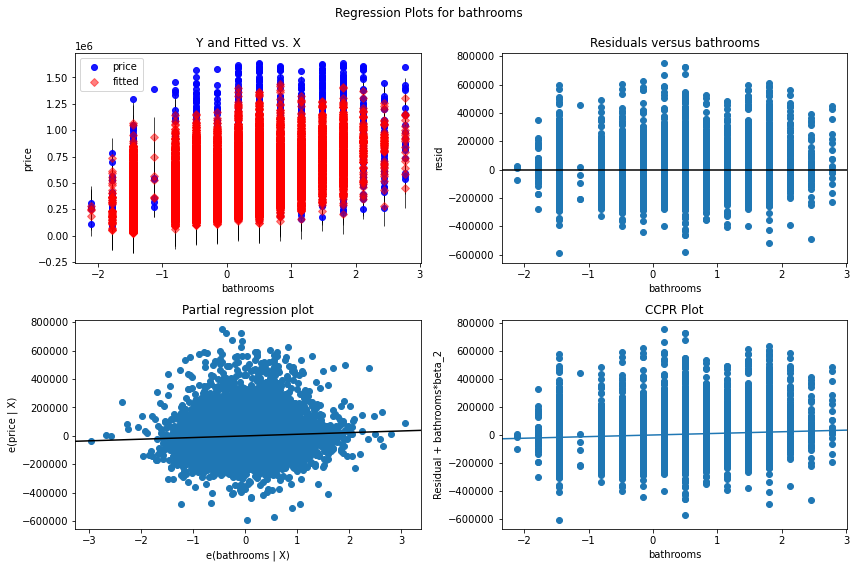

----------------------
sqft_living-----------------


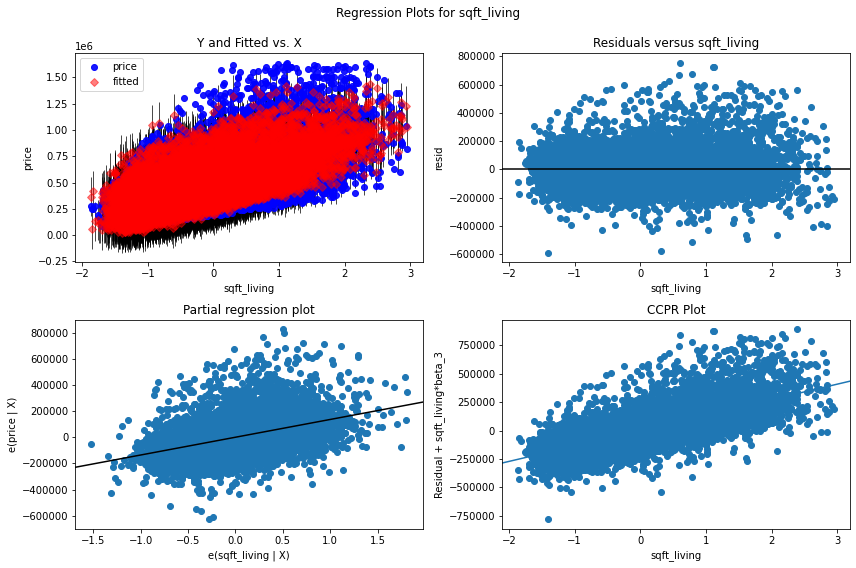

----------------------
sqft_lot-----------------


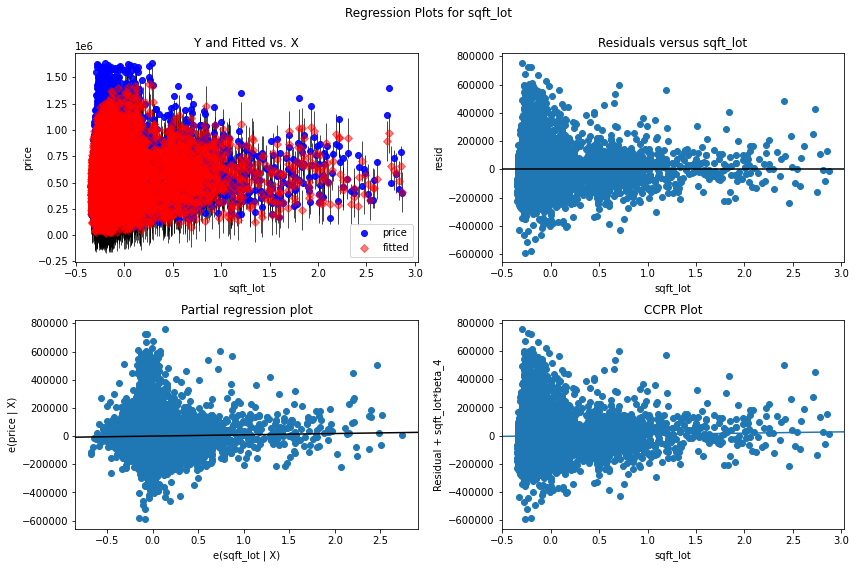

----------------------
floors-----------------


ValueError: 'floors' is not in list

<Figure size 864x576 with 0 Axes>

In [121]:
X_z_zip2 = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'basementyes', 'living_vs_neighbor',
       'live_lot', 'renovated_yes']
for col in X_z_zip2:
    print(f'{col}-----------------')
    sm.graphics.plot_regress_exog(model_zip, col,plt.figure(figsize=(12,8)))
    plt.show()
    print('----------------------')

In [ ]:
# Sqft Lot, # live_lot are heteroscedasticstic

In [ ]:
X_z_zip_ho = ['bedrooms', 'bathrooms', 'sqft_living',
       'floors', 'view', 'condition', 'grade',
       'yr_built', 'basementyes', 'living_vs_neighbor',
       'renovated_yes', 'zipcode_98002',
       'zipcode_98003', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006',
       'zipcode_98007', 'zipcode_98008', 'zipcode_98010', 'zipcode_98011',
       'zipcode_98014', 'zipcode_98019', 'zipcode_98022', 'zipcode_98023',
       'zipcode_98024', 'zipcode_98027', 'zipcode_98028', 'zipcode_98029',
       'zipcode_98030', 'zipcode_98031', 'zipcode_98032', 'zipcode_98033',
       'zipcode_98034', 'zipcode_98038', 'zipcode_98039', 'zipcode_98040',
       'zipcode_98042', 'zipcode_98045', 'zipcode_98052', 'zipcode_98053',
       'zipcode_98055', 'zipcode_98056', 'zipcode_98058', 'zipcode_98059',
       'zipcode_98065', 'zipcode_98070', 'zipcode_98072', 'zipcode_98074',
       'zipcode_98075', 'zipcode_98077', 'zipcode_98092', 'zipcode_98102',
       'zipcode_98103', 'zipcode_98105', 'zipcode_98106', 'zipcode_98107',
       'zipcode_98108', 'zipcode_98109', 'zipcode_98112', 'zipcode_98115',
       'zipcode_98116', 'zipcode_98117', 'zipcode_98118', 'zipcode_98119',
       'zipcode_98122', 'zipcode_98125', 'zipcode_98126', 'zipcode_98133',
       'zipcode_98136', 'zipcode_98144', 'zipcode_98146', 'zipcode_98148',
       'zipcode_98155', 'zipcode_98166', 'zipcode_98168', 'zipcode_98177',
       'zipcode_98178', 'zipcode_98188', 'zipcode_98198', 'zipcode_98199']

In [ ]:
model_ind = model_summary(df_z_loc2, X_z_zip_ho, 'price', True)
sked_show(df_z_loc2, X_z_zip_ho, model_ind)

### Skedacicity Individual Conclusion:
- It has not changed much, concern is that too many high outlier values are left in the dataset

## Going back to IQR because of heteroscedasticity

In [ ]:
# IQR method is more strict on removing outliers

df_iqr4 = df_iqr.copy()

In [ ]:
df_iqr4.drop('yr_renovated', axis=1, inplace=True)

In [ ]:
# Lower bound is negative

res=df_iqr4['price'].describe()
thresh = res['75%'] -res['25%']
u_bound=res['75%']+1.5*thresh
u_bound


In [ ]:
df_iqr4['outlier'] = (df_iqr4['price']>u_bound).map({True:True,
                                False:False})

In [ ]:
df_iqror=df_iqr4.loc[df_iqr4['outlier']==False]

In [ ]:
# Add number of removed values
print(f'Num observations before removal: {len(df)}')
print(f'Num observations after removal:  {len(df_iqror)}')
print(f'Num observations removed:  {len(df) - len(df_iqror)}')
print(f'Percent observations removed:  {round(100*((len(df) - len(df_iqror))/len(df)),2)}%')
print('--------------------------------------------')
fig, axes = plt.subplots(nrows=2, figsize=(6,10))
sns.boxplot(data=df_iqror, x='price', ax=axes[0])
axes[0].set_title('Outliers Removed')
sns.boxplot(data=df_iqr4, x='price', ax=axes[1])
axes[1].set_title('Outliers Not Removed')
plt.show();
print('--------------------------------------------')
print(f"Max Home Price: {df_iqror['price'].max()}")
print(f"Min Home Price: {df_iqror['price'].min()}")

## Baseline Model Price Removal

In [ ]:
X_targs3= ['bedrooms', 'bathrooms', 'sqft_living', 'lat', 'long', 'zipcode',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'yr_built', 'sqft_living15',
       'sqft_lot15', 'basementyes', 'total_rooms', 'living_vs_neighbor',
       'lot_vs_neighbor', 'live_lot', 'renovated_yes']

In [ ]:
model_iqr_price = model_summary(df_iqror, X_targs3, 'price', True)
sked_show(df_iqror, X_targs3,model_iqr_price)

### Baseline IQR Model Conclusion
- While R^2 0.71
- We have homoskedacicity
- QQ model shows very few values tailing off, only past 2.5 quantiles
- Assumptions are better met

## Check for Multicolinearity

In [ ]:
df_iqror.corr()['price'].round(2).sort_values(ascending=False)

In [ ]:
corr2 = df_iqror.corr()

fig, ax = plt.subplots(figsize=(15,15))
matrix = np.triu(corr2)
sns.heatmap(corr2,cmap="coolwarm", annot=True, fmt='.1g', mask=matrix)

In [ ]:
# Remove total_rooms, sqft_above

corr_finder(df_iqror)

In [ ]:
# Confirm we don't have multicolinearity

corr_finder(df_iqror.drop(['total_rooms', 'sqft_above'], axis=1))

In [ ]:
df_iqror_mc = df_iqror.drop(['total_rooms', 'sqft_above'], axis=1)

### Multicolinearity Conclusion
- Had to drop total_rooms and sqft_above because they did not meet assumption of no multicolinearity

In [ ]:
df_iqror_mc.columns
x_targs = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'basementyes', 'living_vs_neighbor', 'lot_vs_neighbor', 'live_lot',
       'renovated_yes']

In [ ]:
model_iqr_co = model_summary(df_iqror_mc, x_targs, 'price', True)
sked_show(df_iqror_mc, x_targs, model_iqr_co)

## Check for assumptions of Linearity

In [ ]:
df_iqror_mc.columns

In [ ]:
# yr_built, sqft_lot do not have linear relationships

# lin_check(df_iqror_mc, x_targs)

In [ ]:
df_iqr_nocl = df_iqror_mc.drop(['yr_built', 'sqft_lot'], axis=1)

In [ ]:
df_iqr_nocl.columns
x_targs = ['bedrooms', 'bathrooms', 'sqft_living', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'basementyes', 'living_vs_neighbor',
       'lot_vs_neighbor', 'live_lot', 'renovated_yes']

In [ ]:
model_iqr5 = model_summary(df_iqr_nocl, x_targs, 'price', True)
sked_show(df_iqr_nocl, x_targs, model_iqr5)

### Checking for assumptions conclusion
- R^2 dropped to 0.674
- All Assumptions have been met

## Final Model

In [ ]:

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')
encoder

cat_cols=['zipcode']

encoder.fit(df_iqr_nocl[cat_cols])

ohe_vars = encoder.transform(df_iqr_nocl[cat_cols])
encoder.get_feature_names(cat_cols)
cat_vars = pd.DataFrame(ohe_vars,columns=encoder.get_feature_names(cat_cols))

In [ ]:
df_iqr_nocl = df_iqr_nocl.reset_index()

In [ ]:
df_iqr_zip = pd.concat([df_iqr_nocl,cat_vars], axis=1)

In [ ]:
df_iqr_zip.columns
x_targs =['bedrooms', 'bathrooms', 'sqft_living',
        'waterfront', 'view', 'condition', 'grade','lat',
       'long', 'sqft_living15', 'sqft_lot15', 'basementyes',
       'living_vs_neighbor', 'lot_vs_neighbor', 'live_lot', 'renovated_yes',
       'zipcode_98002', 'zipcode_98003', 'zipcode_98004',
       'zipcode_98005', 'zipcode_98006', 'zipcode_98007', 'zipcode_98008',
       'zipcode_98010', 'zipcode_98011', 'zipcode_98014', 'zipcode_98019',
       'zipcode_98022', 'zipcode_98023', 'zipcode_98024', 'zipcode_98027',
       'zipcode_98028', 'zipcode_98029', 'zipcode_98030', 'zipcode_98031',
       'zipcode_98032', 'zipcode_98033', 'zipcode_98034', 'zipcode_98038',
       'zipcode_98039', 'zipcode_98040', 'zipcode_98042', 'zipcode_98045',
       'zipcode_98052', 'zipcode_98053', 'zipcode_98055', 'zipcode_98056',
       'zipcode_98058', 'zipcode_98059', 'zipcode_98065', 'zipcode_98070',
       'zipcode_98072', 'zipcode_98074', 'zipcode_98075', 'zipcode_98077',
       'zipcode_98092', 'zipcode_98102', 'zipcode_98103', 'zipcode_98105',
       'zipcode_98106', 'zipcode_98107', 'zipcode_98108', 'zipcode_98109',
       'zipcode_98112', 'zipcode_98115', 'zipcode_98116', 'zipcode_98117',
       'zipcode_98118', 'zipcode_98119', 'zipcode_98122', 'zipcode_98125',
       'zipcode_98126', 'zipcode_98133', 'zipcode_98136', 'zipcode_98144',
       'zipcode_98146', 'zipcode_98148', 'zipcode_98155', 'zipcode_98166',
       'zipcode_98168', 'zipcode_98177', 'zipcode_98178', 'zipcode_98188',
       'zipcode_98198', 'zipcode_98199']

In [ ]:
model_iqr6 = model_summary(df_iqr_zip, x_targs, 'price')
sked_show(df_iqr_zip, x_targs, model_iqr6)

In [ ]:
exog_check =['bedrooms', 'bathrooms', 'sqft_living',
        'waterfront', 'view', 'condition', 'grade','lat',
       'long', 'sqft_living15', 'sqft_lot15', 'basementyes',
       'living_vs_neighbor', 'lot_vs_neighbor', 'live_lot', 'renovated_yes']

for col in exog_check:
    print(f'{col}-----------------')
    sm.graphics.plot_regress_exog(model_iqr6, col,plt.figure(figsize=(12,8)))
    plt.show()
    print('----------------------')

### Final Model Conclusion
- R^2 0.832
- All assumptions have been met
- Using 20,235 observations

## Final Visuals

In [ ]:
df_iqr_zip2 = df_iqr_zip.copy()
cols_to_scale = ['bedrooms', 'bathrooms', 'sqft_living',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'zipcode', 'lat',
       'long', 'sqft_living15', 'sqft_lot15', 'basementyes',
       'living_vs_neighbor', 'lot_vs_neighbor', 'live_lot', 'renovated_yes']

In [ ]:
df_iqr_zip2[cols_to_scale] = scaler.fit_transform(df_iqr_zip2[cols_to_scale])


In [ ]:
x_targs2 = ['bedrooms', 'bathrooms', 'sqft_living',
       'waterfront', 'view', 'condition', 'grade',
       'sqft_living15', 'sqft_lot15', 'basementyes',
       'living_vs_neighbor', 'lot_vs_neighbor', 'live_lot', 'renovated_yes',
        'zipcode_98002', 'zipcode_98003', 'zipcode_98004',
       'zipcode_98005', 'zipcode_98006', 'zipcode_98007', 'zipcode_98008',
       'zipcode_98010', 'zipcode_98011', 'zipcode_98014', 'zipcode_98019',
       'zipcode_98022', 'zipcode_98023', 'zipcode_98024', 'zipcode_98027',
       'zipcode_98028', 'zipcode_98029', 'zipcode_98030', 'zipcode_98031',
       'zipcode_98032', 'zipcode_98033', 'zipcode_98034', 'zipcode_98038',
       'zipcode_98039', 'zipcode_98040', 'zipcode_98042', 'zipcode_98045',
       'zipcode_98052', 'zipcode_98053', 'zipcode_98055', 'zipcode_98056',
       'zipcode_98058', 'zipcode_98059', 'zipcode_98065', 'zipcode_98070',
       'zipcode_98072', 'zipcode_98074', 'zipcode_98075', 'zipcode_98077',
       'zipcode_98092', 'zipcode_98102', 'zipcode_98103', 'zipcode_98105',
       'zipcode_98106', 'zipcode_98107', 'zipcode_98108', 'zipcode_98109',
       'zipcode_98112', 'zipcode_98115', 'zipcode_98116', 'zipcode_98117',
       'zipcode_98118', 'zipcode_98119', 'zipcode_98122', 'zipcode_98125',
       'zipcode_98126', 'zipcode_98133', 'zipcode_98136', 'zipcode_98144',
       'zipcode_98146', 'zipcode_98148', 'zipcode_98155', 'zipcode_98166',
       'zipcode_98168', 'zipcode_98177', 'zipcode_98178', 'zipcode_98188',
       'zipcode_98198', 'zipcode_98199']

In [ ]:
model_iqr7 = model_summary(df_iqr_zip, x_targs2, 'price')

In [ ]:
df_coeff=pd.DataFrame({'coeff': model_iqr7.params, 'abs_coeff': abs(model_iqr7.params)})

In [ ]:
df_coeff.drop('Intercept', axis=0).sort_values(by='abs_coeff').tail(15).plot(kind='barh', y='coeff', figsize=(8,8))

In [ ]:
df_coeff2 = df_coeff.copy()

In [ ]:
df_coeff2.index
indices = ['Intercept', 'bedrooms', 'bathrooms', 'sqft_living', 'waterfront',
       'view', 'condition', 'grade', 'sqft_living15', 'sqft_lot15',
       'basementyes', 'living_vs_neighbor', 'lot_vs_neighbor', 'live_lot',
       'renovated_yes', 'zipcode_98002', 'zipcode_98003', 'zipcode_98004',
       'zipcode_98005', 'zipcode_98006', 'zipcode_98007', 'zipcode_98008',
       'zipcode_98010', 'zipcode_98011', 'zipcode_98014', 'zipcode_98019',
       'zipcode_98022', 'zipcode_98023', 'zipcode_98024', 'zipcode_98027',
       'zipcode_98028', 'zipcode_98029', 'zipcode_98030', 'zipcode_98031',
       'zipcode_98032', 'zipcode_98033', 'zipcode_98034', 'zipcode_98038',
       'zipcode_98039', 'zipcode_98040', 'zipcode_98042', 'zipcode_98045',
       'zipcode_98052', 'zipcode_98053', 'zipcode_98055', 'zipcode_98056',
       'zipcode_98058', 'zipcode_98059', 'zipcode_98065', 'zipcode_98070',
       'zipcode_98072', 'zipcode_98074', 'zipcode_98075', 'zipcode_98077',
       'zipcode_98092', 'zipcode_98102', 'zipcode_98103', 'zipcode_98105',
       'zipcode_98106', 'zipcode_98107', 'zipcode_98108', 'zipcode_98109',
       'zipcode_98112', 'zipcode_98115', 'zipcode_98116', 'zipcode_98117',
       'zipcode_98118', 'zipcode_98119', 'zipcode_98122', 'zipcode_98125',
       'zipcode_98126', 'zipcode_98133', 'zipcode_98136', 'zipcode_98144',
       'zipcode_98146', 'zipcode_98148', 'zipcode_98155', 'zipcode_98166',
       'zipcode_98168', 'zipcode_98177', 'zipcode_98178', 'zipcode_98188',
       'zipcode_98198', 'zipcode_98199']

In [ ]:
non_zip = []
for ind in indices:
    if ind.startswith('zip') or ind.startswith('Int'):
        pass
    else:
        non_zip.append(ind)

In [ ]:
df_coeff2.drop('Intercept', axis=0)

In [ ]:
zips = []
for ind in indices:
    if ind.startswith('zip'):
        zips.append(ind)
    else:
        pass
zips

In [ ]:
df_coeff3 = df_coeff2.drop((zips), axis=0)

In [ ]:
df_coeff3.drop('Intercept', axis=0, inplace=True)

In [ ]:
df_coeff3.sort_values(by='abs_coeff').tail(30).plot(kind='barh', y='coeff', figsize=(8,6))
plt.axvline(0, c='red')
plt.title('Coefficients of Features')
plt.grid()

In [ ]:
# Variables in the owners control

from matplotlib.ticker import FuncFormatter

def millions(x, pos):
    return '%1.1fM' % (x * 1e-6)

with plt.style.context('bmh'):

    fig, axs=plt.subplots(nrows=2, ncols=2, figsize=(18,13))

    sns.stripplot(data=df_iqr_zip, x='waterfront', y='price', ax=axs[0,0], palette="Set2")
    sns.stripplot(data=df_iqr_zip, x='condition', y='price', ax=axs[0,1])
    sns.stripplot(data=df_iqr_zip, x='renovated_yes', y='price', ax=axs[1,0], palette="Set2")
    sns.stripplot(data=df_iqr_zip, x='grade', y='price',ax=axs[1,1], palette="Set2")
    
    tf_labs = ['False', 'True']
    
    axs[0,0].set_title('Waterfront vs. Price', fontsize=14, fontweight='bold')
    axs[0,0].set_xlabel('Waterfront')
    axs[0,0].set_ylabel('Price')
    axs[0,0].set_xticklabels(tf_labs)
    
    axs[0,1].set_title('Condition vs. Price',fontsize=14, fontweight='bold')
    axs[0,1].set_xlabel('Condition')
    axs[0,1].set_ylabel('Price')
    
    axs[1,0].set_title('Has the home been renovated vs. Price', fontsize=14, fontweight='bold')
    axs[1,0].set_xlabel('Has the home been renovated?')
    axs[1,0].set_ylabel('Price')
    axs[1,0].set_xticklabels(tf_labs)
    
    axs[1,1].set_title('Grade vs. Price', fontsize=14, fontweight='bold')
    axs[1,1].set_xlabel('Grade')
    axs[1,1].set_ylabel('Price')
    
    
    
    formatter = FuncFormatter(millions)
    axs[0,0].yaxis.set_major_formatter(formatter)
    axs[0,1].yaxis.set_major_formatter(formatter)
    axs[1,0].yaxis.set_major_formatter(formatter)
    axs[1,1].yaxis.set_major_formatter(formatter)



## Additional Visualizations for Presentation

In [ ]:
# Plot Home prices over time
df_price = df_iqr_zip2.copy()
df_price = df_price.set_index('date')
df_price = df_price.reset_index()


In [ ]:
# Not using title because this is only going in PPT

with plt.style.context('bmh'):
    fig, ax = plt.subplots(figsize=(10,5))
    sns.lineplot(data=df_price, x='date', y='price')

    formatter = FuncFormatter(millions)
    ax.yaxis.set_major_formatter(formatter)
    ax.set_ylabel('Price ($)')
    ax.set_xlabel('Date')


In [ ]:
# Tableau county data